<h1 style="text-align: center;">
    Survey Insights on Data Professionals
</h1>

### Background
As a project manager at a HR consulting firm, I am tasked with understanding the work environment and preferences of data professionals across industries. This includes their roles, salaries, job satisfaction levels, and demographic factors. Our aim is to use these insights to help companies improve their data science teams' effectiveness and job satisfaction.

### Objective
The objective of this analysis is to process and analyze survey data from data professionals to uncover trends and actionable insights that can influence HR policies and recruitment strategies. The analysis will focus on:
1. **Salary and Satisfaction Correlation**:
   - Investigate the relationship between salary levels and various satisfaction metrics (work-life balance, coworker relations, upward mobility).
   - Examine if career switches within the data field affect salary satisfaction differently across industries.

2. **Demographic Analysis**:
   - Analyze demographic variables (age, gender, ethnicity, education) to see if there are any biases in career opportunities or satisfaction levels.
   - Explore the geographic distribution of survey respondents and correlate it with industry-specific trends.

3. **Preference and Priorities**:
   - Identify the most valued aspects of employment among data professionals (e.g., compensation, learning opportunities, management quality).
   - Determine preferred programming languages and tools across different job roles and how these preferences correlate with job satisfaction.

### Expected Analysis Techniques
- **Descriptive Statistics**: To summarize the main features of the dataset and to reveal initial patterns in job satisfaction and salary.
- **Correlation Analysis**: To examine the relationships between salary, satisfaction levels, and demographic factors.
- **Multivariate Analysis**: To explore complex interactions and effects of multiple factors on career satisfaction and salary.

This proposal aims to provide comprehensive insights into the factors that influence job satisfaction and career preferences among data professionals, helping to inform better HR practices and policies. 📊🧑‍💻


### Import Needed Libraries


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore Warnings
warnings.filterwarnings("ignore")

<h2 style="text-align: center; font-size: 25px;">
    Load Data
</h2> 

In [3]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

<h2 style="text-align: center; font-size: 25px;">
    Dataset Overview
</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 28 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Unique ID                                                                                     630 non-null    object 
 1   Email                                                                                         630 non-null    object 
 2   Date Taken (America/New_York)                                                                 630 non-null    object 
 3   Time Taken (America/New_York)                                                                 630 non-null    object 
 4   Browser                                                                                       0 non-null      float64
 5   OS                           

In [5]:
df.describe().style.background_gradient(cmap='RdPu')

,Browser,OS,City,Country,Referrer,Q6 - How Happy are you in your Current Position with the following? (Salary),Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance),Q6 - How Happy are you in your Current Position with the following? (Coworkers),Q6 - How Happy are you in your Current Position with the following? (Management),Q6 - How Happy are you in your Current Position with the following? (Upward Mobility),Q6 - How Happy are you in your Current Position with the following? (Learning New Things),Q10 - Current Age
count,0.000000,0.000000,0.000000,0.000000,0.000000,623.000000,620.000000,619.000000,618.000000,617.000000,625.000000,630.000000
mean,nan,nan,nan,nan,nan,4.269663,5.741935,5.861066,5.326861,4.756888,5.608000,29.866667
std,nan,nan,nan,nan,nan,2.772945,2.761584,2.703244,2.738161,2.820822,3.006659,7.245941
min,nan,nan,nan,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,nan,nan,nan,nan,nan,2.000000,4.000000,4.000000,4.000000,3.000000,3.000000,25.000000
50%,nan,nan,nan,nan,nan,4.000000,6.000000,6.000000,5.000000,5.000000,6.000000,28.000000
75%,nan,nan,nan,nan,nan,7.000000,8.000000,8.000000,7.000000,7.000000,8.000000,33.000000
max,nan,nan,nan,nan,nan,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,92.000000


In [6]:
df.head()

,Unique ID,Email,Date Taken (America/New_York),Time Taken (America/New_York),Browser,OS,City,Country,Referrer,Time Spent,...,Q6 - How Happy are you in your Current Position with the following? (Management),Q6 - How Happy are you in your Current Position with the following? (Upward Mobility),Q6 - How Happy are you in your Current Position with the following? (Learning New Things),Q7 - How difficult was it for you to break into Data?,"Q8 - If you were to look for a new job today, what would be the most important thing to you?",Q9 - Male/Female?,Q10 - Current Age,Q11 - Which Country do you live in?,Q12 - Highest Level of Education,Q13 - Ethnicity
0,62a33b3db4da29969c62df3d,anonymous,06/10/2022,08:38,NaN,NaN,NaN,NaN,NaN,00:00:44,...,5.0,5.0,7.0,Very Difficult,Remote Work,Male,26,United States,NaN,White or Caucasian
1,62a33ba1bae91e4b8b82e35c,anonymous,06/10/2022,08:40,NaN,NaN,NaN,NaN,NaN,00:01:30,...,2.0,1.0,3.0,Very Difficult,Remote Work,Male,36,Canada,NaN,Asian or Asian American
2,62a33c2cbc6861bf3176bec1,anonymous,06/10/2022,08:42,NaN,NaN,NaN,NaN,NaN,00:02:18,...,5.0,7.0,7.0,Easy,Good Work/Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American
3,62a33c8624a26260273822f9,anonymous,06/10/2022,08:43,NaN,NaN,NaN,NaN,NaN,00:02:10,...,10.0,7.0,10.0,Very Easy,Remote Work,Female,35,Canada,NaN,White or Caucasian
4,62a33c91f3072dd892621e03,anonymous,06/10/2022,08:44,NaN,NaN,NaN,NaN,NaN,00:01:51,...,4.0,0.0,1.0,Difficult,Better Salary,Male,44,United States,NaN,Black or African American


In [7]:
df.columns

Index(['Unique ID', 'Email', 'Date Taken (America/New_York)',
       'Time Taken (America/New_York)', 'Browser', 'OS', 'City', 'Country',
       'Referrer', 'Time Spent',
       'Q1 - Which Title Best Fits your Current Role?',
       'Q2 - Did you switch careers into Data?',
       'Q3 - Current Yearly Salary (in USD)',
       'Q4 - What Industry do you work in?',
       'Q5 - Favorite Programming Language',
       'Q6 - How Happy are you in your Current Position with the following? (Salary)',
       'Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance)',
       'Q6 - How Happy are you in your Current Position with the following? (Coworkers)',
       'Q6 - How Happy are you in your Current Position with the following? (Management)',
       'Q6 - How Happy are you in your Current Position with the following? (Upward Mobility)',
       'Q6 - How Happy are you in your Current Position with the following? (Learning New Things)',
       'Q7 - How difficult

<h2 style="text-align: center; font-size: 25px;">
    Data Cleaning and Preparation
</h2> 

### Drop Columns

In [8]:
# List of columns to drop
columns_to_drop = [
    "Email",
    "Date Taken (America/New_York)",
    "Time Taken (America/New_York)",
    "Browser",
    "OS",
    "City",
    "Country",
    "Referrer",
    "Time Spent",
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

df

,Unique ID,Q1 - Which Title Best Fits your Current Role?,Q2 - Did you switch careers into Data?,Q3 - Current Yearly Salary (in USD),Q4 - What Industry do you work in?,Q5 - Favorite Programming Language,Q6 - How Happy are you in your Current Position with the following? (Salary),Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance),Q6 - How Happy are you in your Current Position with the following? (Coworkers),Q6 - How Happy are you in your Current Position with the following? (Management),Q6 - How Happy are you in your Current Position with the following? (Upward Mobility),Q6 - How Happy are you in your Current Position with the following? (Learning New Things),Q7 - How difficult was it for you to break into Data?,"Q8 - If you were to look for a new job today, what would be the most important thing to you?",Q9 - Male/Female?,Q10 - Current Age,Q11 - Which Country do you live in?,Q12 - Highest Level of Education,Q13 - Ethnicity
0,62a33b3db4da29969c62df3d,Data Analyst,Yes,106k-125k,Healthcare,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Remote Work,Male,26,United States,NaN,White or Caucasian
1,62a33ba1bae91e4b8b82e35c,Data Analyst,No,41k-65k,Finance,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Remote Work,Male,36,Canada,NaN,Asian or Asian American
2,62a33c2cbc6861bf3176bec1,Data Engineer,No,0-40k,Other (Please Specify):Clean Energy,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Good Work/Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American
3,62a33c8624a26260273822f9,Other (Please Specify):Analytics Consultant,Yes,150k-225k,Finance,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Remote Work,Female,35,Canada,NaN,White or Caucasian
4,62a33c91f3072dd892621e03,Data Analyst,Yes,41k-65k,Healthcare,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Better Salary,Male,44,United States,NaN,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,62b525563f28f20328aeee5c,Data Analyst,Yes,125k-150k,Other (Please Specify):Retail,R,8.0,5.0,6.0,6.0,5.0,7.0,Easy,Better Salary,Male,26,United States,Bachelors,White or Caucasian
626,62b5a3e29bc428d5345f6e89,Other (Please Specify):Data Scientist Intern,No,0-40k,Other (Please Specify):Manufacturing,R,4.0,6.0,7.0,7.0,4.0,6.0,Difficult,Better Salary,Male,21,United States,Bachelors,White or Caucasian
627,62b71083f31287f32e189026,Student/Looking/None,Yes,0-40k,Tech,Python,1.0,2.0,1.0,2.0,1.0,2.0,Difficult,Better Salary,Male,26,Other (Please Specify):Oman,Bachelors,Asian or Asian American
628,62b795033b026e423f287ecd,Data Engineer,No,0-40k,Tech,Python,6.0,6.0,6.0,6.0,4.0,3.0,Easy,Other (Please Specify):Career Advancedment,Male,24,Other (Please Specify):Costa Rica,Bachelors,Hispanic or Latino


<h2>
Adjusting Columns
</h2>

<h3>
Unique ID
</h3>

In [9]:
# Replace 'Unique ID' values with a sequence starting from 1
df['Unique ID'] = range(1, len(df) + 1)

df

,Unique ID,Q1 - Which Title Best Fits your Current Role?,Q2 - Did you switch careers into Data?,Q3 - Current Yearly Salary (in USD),Q4 - What Industry do you work in?,Q5 - Favorite Programming Language,Q6 - How Happy are you in your Current Position with the following? (Salary),Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance),Q6 - How Happy are you in your Current Position with the following? (Coworkers),Q6 - How Happy are you in your Current Position with the following? (Management),Q6 - How Happy are you in your Current Position with the following? (Upward Mobility),Q6 - How Happy are you in your Current Position with the following? (Learning New Things),Q7 - How difficult was it for you to break into Data?,"Q8 - If you were to look for a new job today, what would be the most important thing to you?",Q9 - Male/Female?,Q10 - Current Age,Q11 - Which Country do you live in?,Q12 - Highest Level of Education,Q13 - Ethnicity
0,1,Data Analyst,Yes,106k-125k,Healthcare,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Remote Work,Male,26,United States,NaN,White or Caucasian
1,2,Data Analyst,No,41k-65k,Finance,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Remote Work,Male,36,Canada,NaN,Asian or Asian American
2,3,Data Engineer,No,0-40k,Other (Please Specify):Clean Energy,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Good Work/Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American
3,4,Other (Please Specify):Analytics Consultant,Yes,150k-225k,Finance,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Remote Work,Female,35,Canada,NaN,White or Caucasian
4,5,Data Analyst,Yes,41k-65k,Healthcare,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Better Salary,Male,44,United States,NaN,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,Data Analyst,Yes,125k-150k,Other (Please Specify):Retail,R,8.0,5.0,6.0,6.0,5.0,7.0,Easy,Better Salary,Male,26,United States,Bachelors,White or Caucasian
626,627,Other (Please Specify):Data Scientist Intern,No,0-40k,Other (Please Specify):Manufacturing,R,4.0,6.0,7.0,7.0,4.0,6.0,Difficult,Better Salary,Male,21,United States,Bachelors,White or Caucasian
627,628,Student/Looking/None,Yes,0-40k,Tech,Python,1.0,2.0,1.0,2.0,1.0,2.0,Difficult,Better Salary,Male,26,Other (Please Specify):Oman,Bachelors,Asian or Asian American
628,629,Data Engineer,No,0-40k,Tech,Python,6.0,6.0,6.0,6.0,4.0,3.0,Easy,Other (Please Specify):Career Advancedment,Male,24,Other (Please Specify):Costa Rica,Bachelors,Hispanic or Latino


<h3>
Columns renaming
</h3>

In [10]:
df.columns

Index(['Unique ID', 'Q1 - Which Title Best Fits your Current Role?',
       'Q2 - Did you switch careers into Data?',
       'Q3 - Current Yearly Salary (in USD)',
       'Q4 - What Industry do you work in?',
       'Q5 - Favorite Programming Language',
       'Q6 - How Happy are you in your Current Position with the following? (Salary)',
       'Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance)',
       'Q6 - How Happy are you in your Current Position with the following? (Coworkers)',
       'Q6 - How Happy are you in your Current Position with the following? (Management)',
       'Q6 - How Happy are you in your Current Position with the following? (Upward Mobility)',
       'Q6 - How Happy are you in your Current Position with the following? (Learning New Things)',
       'Q7 - How difficult was it for you to break into Data?',
       'Q8 - If you were to look for a new job today, what would be the most important thing to you?',
       'Q9 - Male

In [11]:
# Renaming the columns
df = df.rename(
    columns={
        "Unique ID": "ID",
        "Q1 - Which Title Best Fits your Current Role?": "Current Role",
        "Q2 - Did you switch careers into Data?": "Careers Switch",
        "Q3 - Current Yearly Salary (in USD)": "Yearly Salary (in USD)",
        "Q4 - What Industry do you work in?": "Industry",
        "Q5 - Favorite Programming Language": "Favorite Programming Language",
        "Q6 - How Happy are you in your Current Position with the following? (Salary)": "Salary Satisfaction",
        "Q6 - How Happy are you in your Current Position with the following? (Work/Life Balance)": "Work/Balance Satisfaction",
        "Q6 - How Happy are you in your Current Position with the following? (Coworkers)": "Coworkers Satisfaction",
        "Q6 - How Happy are you in your Current Position with the following? (Management)": "Management Satisfaction",
        "Q6 - How Happy are you in your Current Position with the following? (Upward Mobility)": "Upward Mobility Satisfaction",
        "Q6 - How Happy are you in your Current Position with the following? (Learning New Things)": "Learning New Things Satisfaction",
        "Q7 - How difficult was it for you to break into Data?": "Difficulty to Break",
        "Q8 - If you were to look for a new job today, what would be the most important thing to you?": "Most Important Thing",
        "Q9 - Male/Female?": "Gender",
        "Q10 - Current Age": "Age",
        "Q11 - Which Country do you live in?": "Country",
        "Q12 - Highest Level of Education": "Level of Education",
        "Q13 - Ethnicity": "Ethnicity",
    }
)

df

,ID,Current Role,Careers Switch,Yearly Salary (in USD),Industry,Favorite Programming Language,Salary Satisfaction,Work/Balance Satisfaction,Coworkers Satisfaction,Management Satisfaction,Upward Mobility Satisfaction,Learning New Things Satisfaction,Difficulty to Break,Most Important Thing,Gender,Age,Country,Level of Education,Ethnicity
0,1,Data Analyst,Yes,106k-125k,Healthcare,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Remote Work,Male,26,United States,NaN,White or Caucasian
1,2,Data Analyst,No,41k-65k,Finance,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Remote Work,Male,36,Canada,NaN,Asian or Asian American
2,3,Data Engineer,No,0-40k,Other (Please Specify):Clean Energy,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Good Work/Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American
3,4,Other (Please Specify):Analytics Consultant,Yes,150k-225k,Finance,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Remote Work,Female,35,Canada,NaN,White or Caucasian
4,5,Data Analyst,Yes,41k-65k,Healthcare,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Better Salary,Male,44,United States,NaN,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,Data Analyst,Yes,125k-150k,Other (Please Specify):Retail,R,8.0,5.0,6.0,6.0,5.0,7.0,Easy,Better Salary,Male,26,United States,Bachelors,White or Caucasian
626,627,Other (Please Specify):Data Scientist Intern,No,0-40k,Other (Please Specify):Manufacturing,R,4.0,6.0,7.0,7.0,4.0,6.0,Difficult,Better Salary,Male,21,United States,Bachelors,White or Caucasian
627,628,Student/Looking/None,Yes,0-40k,Tech,Python,1.0,2.0,1.0,2.0,1.0,2.0,Difficult,Better Salary,Male,26,Other (Please Specify):Oman,Bachelors,Asian or Asian American
628,629,Data Engineer,No,0-40k,Tech,Python,6.0,6.0,6.0,6.0,4.0,3.0,Easy,Other (Please Specify):Career Advancedment,Male,24,Other (Please Specify):Costa Rica,Bachelors,Hispanic or Latino


<h3>
Current Role
</h3>

In [12]:
# Display the unique values in the 'Current Role' column
unique_roles = df['Current Role'].unique()
unique_roles.sort()
unique_roles

array(['Data Analyst', 'Data Architect', 'Data Engineer',
       'Data Scientist', 'Database Developer', 'Other (Please Specify)',
       'Other (Please Specify):Account manager',
       'Other (Please Specify):Ads operations',
       'Other (Please Specify):Analyst',
       'Other (Please Specify):Analyst Primary Market Intelligence',
       'Other (Please Specify):Analytics Consultant ',
       'Other (Please Specify):Analytics Engineer',
       'Other (Please Specify):Analytics Manager',
       'Other (Please Specify):BI Developer ',
       'Other (Please Specify):BI Manager',
       'Other (Please Specify):BI consultant ',
       'Other (Please Specify):Billing analyst',
       'Other (Please Specify):Business Analys',
       'Other (Please Specify):Business Analyst',
       'Other (Please Specify):Business Analyst ',
       'Other (Please Specify):Business Intelligence Analyst',
       'Other (Please Specify):Business Intelligence Consultant',
       'Other (Please Specify):Busine

In [13]:
role_mapping = {
    "Other (Please Specify)": "None",
    "Other (Please Specify):Account manager": "Manager",
    "Other (Please Specify):Ads operations": "Ads Operations",
    "Other (Please Specify):Analyst": "Analyst",
    "Other (Please Specify):Analyst Primary Market Intelligence": "Analyst",
    "Other (Please Specify):Analytics Consultant ": "Consultant",
    "Other (Please Specify):Analytics Engineer": "Engineer",
    "Other (Please Specify):Analytics Manager": "Manager",
    "Other (Please Specify):BI Developer ": "Developer",
    "Other (Please Specify):BI Manager": "Manager",
    "Other (Please Specify):BI consultant ": "Consultant",
    "Other (Please Specify):Billing analyst": "Analyst",
    "Other (Please Specify):Business Analys": "Analyst",
    "Other (Please Specify):Business Analyst": "Analyst",
    "Other (Please Specify):Business Analyst ": "Analyst",
    "Other (Please Specify):Business Intelligence Analyst": "Analyst",
    "Other (Please Specify):Business Intelligence Consultant": "Consultant",
    "Other (Please Specify):Business Intelligence Developer": "Developer",
    "Other (Please Specify):Business Intelligence Engineer": "Engineer",
    "Other (Please Specify):Business analyst ": "Analyst",
    "Other (Please Specify):Consultant": "Consultant",
    "Other (Please Specify):Continuous Quality Improvement Specialist": "Specialist",
    "Other (Please Specify):DBA": "Database Administrator",
    "Other (Please Specify):Data Coordinator": "Database Coordinator",
    "Other (Please Specify):Data Integrity": "Database Integrity",
    "Other (Please Specify):Data Manager": "Manager",
    "Other (Please Specify):Data Scientist Intern": "Data Scientist",
    "Other (Please Specify):Data Steward": "Data Steward",
    "Other (Please Specify):Data manager": "Manager",
    "Other (Please Specify):Database Manager": "Manager",
    "Other (Please Specify):Director": "Director",
    "Other (Please Specify):Director of Data Analytics": "Director",
    "Other (Please Specify):Does a social media analyst count?": "Analyst",
    "Other (Please Specify):Driver": "Driver",
    "Other (Please Specify):Educator": "Teacher",
    "Other (Please Specify):FP&A Analyst": "Analyst",
    "Other (Please Specify):Finance Analyst ": "Analyst",
    "Other (Please Specify):Financial Analyst": "Analyst",
    "Other (Please Specify):GIS Analyst ": "Analyst",
    "Other (Please Specify):I work with data tools and can create simple dashboards but I am not a data scientist": "Data Scientist",
    "Other (Please Specify):Incident Manager": "Manager",
    "Other (Please Specify):Informatics Specialist": "Specialist",
    "Other (Please Specify):Insights analyst": "Analyst",
    "Other (Please Specify):Investigation specialist": "Specialist",
    "Other (Please Specify):Jr. Data Scientist": "Data Scientist",
    "Other (Please Specify):Junior Software Engineer": "Engineer",
    "Other (Please Specify):Learning Management Specialist": "Specialist",
    "Other (Please Specify):Manager ": "Manager",
    "Other (Please Specify):Manager of a team of Data Analysts": "Manager",
    "Other (Please Specify):Manager, Business Intelligence Develop": "Manager",
    "Other (Please Specify):Marketing Data Specialist": "Manager",
    "Other (Please Specify):PMO": "PMO",
    "Other (Please Specify):Power Bi Developer": "Developer",
    "Other (Please Specify):Predictive Analyst": "Analyst",
    "Other (Please Specify):Presales Engineer ": "Engineer",
    "Other (Please Specify):Product owner": "Product Owner",
    "Other (Please Specify):RF Engineer": "Engineer",
    "Other (Please Specify):Reporting Adm": "Reporting Admistrator",
    "Other (Please Specify):Research Analyst": "Analyst",
    "Other (Please Specify):Research Associate ": "Associate",
    "Other (Please Specify):Researchers ": "Researcher",
    "Other (Please Specify):SAP Security Analyst": "Analyst",
    "Other (Please Specify):Sales & marketing": "Analyst",
    "Other (Please Specify):Senior Business Analyst": "Analyst",
    "Other (Please Specify):Software Developer ": "Developer",
    "Other (Please Specify):Software Engineer, AI ": "Engineer",
    "Other (Please Specify):Software support": "Software Support",
    "Other (Please Specify):Sr. Supply Chain Analyst ": "Analyst",
    "Other (Please Specify):Student working as a data analyst intern ": "Data Analyst",
    "Other (Please Specify):Support Engineer": "Engineer",
    "Other (Please Specify):System Administrator": "System Administrator",
    "Other (Please Specify):Systems configuration ": "Systems Configuration",
    "Other (Please Specify):Tableau admin": "Tableau Administrator",
    "Other (Please Specify):Teacher": "Teacher",
    "Other (Please Specify):Technical consulta": "Consultant",
    "Other (Please Specify):Web Developer": "Developer",
    "Other (Please Specify):software engineer": "Engineer",
    "Student/Looking/None": "None",
}


df["Current Role"] = df["Current Role"].apply(lambda x: role_mapping.get(x, x))
df

,ID,Current Role,Careers Switch,Yearly Salary (in USD),Industry,Favorite Programming Language,Salary Satisfaction,Work/Balance Satisfaction,Coworkers Satisfaction,Management Satisfaction,Upward Mobility Satisfaction,Learning New Things Satisfaction,Difficulty to Break,Most Important Thing,Gender,Age,Country,Level of Education,Ethnicity
0,1,Data Analyst,Yes,106k-125k,Healthcare,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Remote Work,Male,26,United States,NaN,White or Caucasian
1,2,Data Analyst,No,41k-65k,Finance,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Remote Work,Male,36,Canada,NaN,Asian or Asian American
2,3,Data Engineer,No,0-40k,Other (Please Specify):Clean Energy,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Good Work/Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American
3,4,Consultant,Yes,150k-225k,Finance,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Remote Work,Female,35,Canada,NaN,White or Caucasian
4,5,Data Analyst,Yes,41k-65k,Healthcare,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Better Salary,Male,44,United States,NaN,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,Data Analyst,Yes,125k-150k,Other (Please Specify):Retail,R,8.0,5.0,6.0,6.0,5.0,7.0,Easy,Better Salary,Male,26,United States,Bachelors,White or Caucasian
626,627,Data Scientist,No,0-40k,Other (Please Specify):Manufacturing,R,4.0,6.0,7.0,7.0,4.0,6.0,Difficult,Better Salary,Male,21,United States,Bachelors,White or Caucasian
627,628,None,Yes,0-40k,Tech,Python,1.0,2.0,1.0,2.0,1.0,2.0,Difficult,Better Salary,Male,26,Other (Please Specify):Oman,Bachelors,Asian or Asian American
628,629,Data Engineer,No,0-40k,Tech,Python,6.0,6.0,6.0,6.0,4.0,3.0,Easy,Other (Please Specify):Career Advancedment,Male,24,Other (Please Specify):Costa Rica,Bachelors,Hispanic or Latino


<h3>
Yearly Salary
</h3>

In [14]:
# Display the unique values in the 'Yearly Salary (in USD)' column to understand its format and content
unique_salaries = df['Yearly Salary (in USD)'].unique()
unique_salaries.sort()
unique_salaries

array(['0-40k', '106k-125k', '125k-150k', '150k-225k', '225k+', '41k-65k',
       '66k-85k', '86k-105k'], dtype=object)

In [15]:
# Function to extract and convert the salary minimum
def extract_salary_min(salary_range):
    if salary_range == "225k+":
        return 225000  # Lower bound for '225k+'
    else:
        return (
            int(salary_range.split("-")[0].replace("k", "")) * 1000
        )  # Convert 'k' to thousands


# Function to extract and convert the salary maximum
def extract_salary_max(salary_range):
    if salary_range == "225k+":
        return None  # No upper bound for '225k+'
    else:
        return (
            int(salary_range.split("-")[1].replace("k", "")) * 1000
        )  # Convert 'k' to thousands


# Applying the functions to create new columns for Salary Min and Max
df["Salary Min (USD)"] = df["Yearly Salary (in USD)"].apply(extract_salary_min)
df["Salary Max (USD)"] = df["Yearly Salary (in USD)"].apply(extract_salary_max)

# Display the first few rows to confirm the changes
df[["Yearly Salary (in USD)", "Salary Min (USD)", "Salary Max (USD)"]]

,Yearly Salary (in USD),Salary Min (USD),Salary Max (USD)
0,106k-125k,106000,125000.0
1,41k-65k,41000,65000.0
2,0-40k,0,40000.0
3,150k-225k,150000,225000.0
4,41k-65k,41000,65000.0
...,...,...,...
625,125k-150k,125000,150000.0
626,0-40k,0,40000.0
627,0-40k,0,40000.0
628,0-40k,0,40000.0


In [16]:
# Calculating the average salary where possible, and using Salary Min for '225k+' category
df["Average Salary (USD)"] = (
    df["Salary Min (USD)"] + df["Salary Max (USD)"].fillna(df["Salary Min (USD)"])
) / 2

# Dropping the original 'Yearly Salary (in USD)' column
df.drop("Yearly Salary (in USD)", axis=1, inplace=True)
df.drop("Salary Min (USD)", axis=1, inplace=True)
df.drop("Salary Max (USD)", axis=1, inplace=True)

# Display the first few rows to confirm the changes
df

,ID,Current Role,Careers Switch,Industry,Favorite Programming Language,Salary Satisfaction,Work/Balance Satisfaction,Coworkers Satisfaction,Management Satisfaction,Upward Mobility Satisfaction,Learning New Things Satisfaction,Difficulty to Break,Most Important Thing,Gender,Age,Country,Level of Education,Ethnicity,Average Salary (USD)
0,1,Data Analyst,Yes,Healthcare,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Remote Work,Male,26,United States,NaN,White or Caucasian,115500.0
1,2,Data Analyst,No,Finance,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Remote Work,Male,36,Canada,NaN,Asian or Asian American,53000.0
2,3,Data Engineer,No,Other (Please Specify):Clean Energy,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Good Work/Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American,20000.0
3,4,Consultant,Yes,Finance,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Remote Work,Female,35,Canada,NaN,White or Caucasian,187500.0
4,5,Data Analyst,Yes,Healthcare,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Better Salary,Male,44,United States,NaN,Black or African American,53000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,Data Analyst,Yes,Other (Please Specify):Retail,R,8.0,5.0,6.0,6.0,5.0,7.0,Easy,Better Salary,Male,26,United States,Bachelors,White or Caucasian,137500.0
626,627,Data Scientist,No,Other (Please Specify):Manufacturing,R,4.0,6.0,7.0,7.0,4.0,6.0,Difficult,Better Salary,Male,21,United States,Bachelors,White or Caucasian,20000.0
627,628,None,Yes,Tech,Python,1.0,2.0,1.0,2.0,1.0,2.0,Difficult,Better Salary,Male,26,Other (Please Specify):Oman,Bachelors,Asian or Asian American,20000.0
628,629,Data Engineer,No,Tech,Python,6.0,6.0,6.0,6.0,4.0,3.0,Easy,Other (Please Specify):Career Advancedment,Male,24,Other (Please Specify):Costa Rica,Bachelors,Hispanic or Latino,20000.0


In [17]:
column_order = [
    col for col in df.columns if col not in ["Average Salary (USD)"]
]  # All columns except 'Average Salary (USD)'
# Insert 'Average Salary (USD)' after 'Current Role'
current_role_index = column_order.index("Current Role")
column_order.insert(current_role_index + 1, "Average Salary (USD)")
df = df[column_order]
df

,ID,Current Role,Average Salary (USD),Careers Switch,Industry,Favorite Programming Language,Salary Satisfaction,Work/Balance Satisfaction,Coworkers Satisfaction,Management Satisfaction,Upward Mobility Satisfaction,Learning New Things Satisfaction,Difficulty to Break,Most Important Thing,Gender,Age,Country,Level of Education,Ethnicity
0,1,Data Analyst,115500.0,Yes,Healthcare,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Remote Work,Male,26,United States,NaN,White or Caucasian
1,2,Data Analyst,53000.0,No,Finance,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Remote Work,Male,36,Canada,NaN,Asian or Asian American
2,3,Data Engineer,20000.0,No,Other (Please Specify):Clean Energy,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Good Work/Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American
3,4,Consultant,187500.0,Yes,Finance,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Remote Work,Female,35,Canada,NaN,White or Caucasian
4,5,Data Analyst,53000.0,Yes,Healthcare,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Better Salary,Male,44,United States,NaN,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,Data Analyst,137500.0,Yes,Other (Please Specify):Retail,R,8.0,5.0,6.0,6.0,5.0,7.0,Easy,Better Salary,Male,26,United States,Bachelors,White or Caucasian
626,627,Data Scientist,20000.0,No,Other (Please Specify):Manufacturing,R,4.0,6.0,7.0,7.0,4.0,6.0,Difficult,Better Salary,Male,21,United States,Bachelors,White or Caucasian
627,628,None,20000.0,Yes,Tech,Python,1.0,2.0,1.0,2.0,1.0,2.0,Difficult,Better Salary,Male,26,Other (Please Specify):Oman,Bachelors,Asian or Asian American
628,629,Data Engineer,20000.0,No,Tech,Python,6.0,6.0,6.0,6.0,4.0,3.0,Easy,Other (Please Specify):Career Advancedment,Male,24,Other (Please Specify):Costa Rica,Bachelors,Hispanic or Latino


<h3>
Industry
</h3>

In [18]:
# Industry
unique_industries = df['Industry'].unique()
unique_industries.sort()
unique_industries

array(['Agriculture', 'Construction', 'Education', 'Finance',
       'Healthcare', 'Other (Please Specify)',
       'Other (Please Specify): Manufacturering ',
       'Other (Please Specify):Advertising',
       'Other (Please Specify):Aerospace',
       'Other (Please Specify):Air transpo',
       'Other (Please Specify):Arrosp',
       'Other (Please Specify):Audit Firm',
       'Other (Please Specify):Automobile (cars)',
       'Other (Please Specify):Automobile Industry',
       'Other (Please Specify):Automotive',
       'Other (Please Specify):Automotive ',
       'Other (Please Specify):Avia', 'Other (Please Specify):Aviation',
       'Other (Please Specify):Beverage and foods',
       'Other (Please Specify):Biotech',
       'Other (Please Specify):Chemical Manufacturing',
       'Other (Please Specify):Clean Energy',
       'Other (Please Specify):Cobsukting', 'Other (Please Specify):Cons',
       'Other (Please Specify):Consulti',
       'Other (Please Specify):Consulting',
 

In [19]:
industry_mapping = {
    "Agriculture": "Agriculture",
    "Construction": "Construction",
    "Education": "Education",
    "Finance": "Finance",
    "Healthcare": "Healthcare",
    "Other (Please Specify)": "None",
    "Other (Please Specify): Manufacturering ": "Manufacturing",
    "Other (Please Specify):Advertising": "Advertising and Marketing",
    "Other (Please Specify):Aerospace": "Aerospace",
    "Other (Please Specify):Air transpo": "Transportation",
    "Other (Please Specify):Arrosp": "Aerospace",
    "Other (Please Specify):Audit Firm": "Finance",
    "Other (Please Specify):Automobile (cars)": "Manufacturing",
    "Other (Please Specify):Automobile Industry": "Manufacturing",
    "Other (Please Specify):Automotive": "Manufacturing",
    "Other (Please Specify):Automotive ": "Manufacturing",
    "Other (Please Specify):Avia": "Aviation",
    "Other (Please Specify):Aviation": "Aviation",
    "Other (Please Specify):Beverage and foods": "Beverage and Food",
    "Other (Please Specify):Biotech": "Biotecnology",
    "Other (Please Specify):Chemical Manufacturing": "Manufacturing",
    "Other (Please Specify):Clean Energy": "Energy",
    "Other (Please Specify):Cobsukting": "Consulting",
    "Other (Please Specify):Cons": "Consulting",
    "Other (Please Specify):Consulti": "Consulting",
    "Other (Please Specify):Consulting": "Consulting",
    "Other (Please Specify):Consumer Elec": "Consumer Electronics",
    "Other (Please Specify):Consumer retail": "Retail",
    "Other (Please Specify):Cosmetics ": "Cosmetics",
    "Other (Please Specify):Coworking space ": "Real Estate",
    "Other (Please Specify):Culinary": "Food and Beverage",
    "Other (Please Specify):Culture": "Arts and Culture",
    "Other (Please Specify):Currently studying . Previously worked in Power Generation": "None",
    "Other (Please Specify):Customer Service": "Customer Service",
    "Other (Please Specify):Customer service ": "Customer Service",
    "Other (Please Specify):Customer support ": "Customer Service",
    "Other (Please Specify):Data insights company": "Data Services",
    "Other (Please Specify):Defense": "Defense",
    "Other (Please Specify):Demography and Social Statistics ": "Social Sciences",
    "Other (Please Specify):Digital Mar": "Advertising and Marketing",
    "Other (Please Specify):Digital Marketing ": "Advertising and Marketing",
    "Other (Please Specify):Direct Marketing": "Advertising and Marketing",
    "Other (Please Specify):Distribution": "Distribution",
    "Other (Please Specify):Distribution ": "Distribution",
    "Other (Please Specify):E-commerce": "E-commerce",
    "Other (Please Specify):Ecom": "E-commerce",
    "Other (Please Specify):Ecommerce": "E-commerce",
    "Other (Please Specify):Electronics": "Electronics",
    "Other (Please Specify):Energy": "Energy",
    "Other (Please Specify):Energy ": "Energy",
    "Other (Please Specify):Energy (oil and gas)": "Energy",
    "Other (Please Specify):Entertainment": "Entertainment",
    "Other (Please Specify):Entertainment ": "Entertainment",
    "Other (Please Specify):FMCG": "FMCG",
    "Other (Please Specify):Fmcg": "FMCG",
    "Other (Please Specify):Food & Beverage ": "Food and Beverage",
    "Other (Please Specify):Food and Beverages": "Food and Beverage",
    "Other (Please Specify):Food and bece": "Food and Beverage",
    "Other (Please Specify):Foodservice": "Food and Beverage",
    "Other (Please Specify):Foodservice Franchising": "Food and Beverage",
    "Other (Please Specify):General contractor": "Construction",
    "Other (Please Specify):Gover": "Government",
    "Other (Please Specify):Government": "Government",
    "Other (Please Specify):Government ": "Government",
    "Other (Please Specify):Government Administration": "Government",
    "Other (Please Specify):Government programs": "Government",
    "Other (Please Specify):Home and living": "Home and Living",
    "Other (Please Specify):Home maker ": "Home and Living",
    "Other (Please Specify):Homelessness": "Social Services",
    "Other (Please Specify):Hospitality ": "Hospitality",
    "Other (Please Specify):I am a student": "None",
    "Other (Please Specify):I am student. ": "None",
    "Other (Please Specify):IT": "Information Technology",
    "Other (Please Specify):Igaming": "Gaming",
    "Other (Please Specify):Insurance": "Insurance",
    "Other (Please Specify):Insurance ": "Insurance",
    "Other (Please Specify):Interning in Sciences, Weather and Meteorological data": "Science and Research",
    "Other (Please Specify):Law Enforcement": "Law Enforcement",
    "Other (Please Specify):Legal": "Legal",
    "Other (Please Specify):Logistics": "Logistics",
    "Other (Please Specify):Logistics and warehousing": "Logistics",
    "Other (Please Specify):Looking for job": "None",
    "Other (Please Specify):Management": "Management",
    "Other (Please Specify):Manuf": "Manufacturing",
    "Other (Please Specify):Manufa": "Manufacturing",
    "Other (Please Specify):Manufacturing": "Manufacturing",
    "Other (Please Specify):Manufacturing (Chemicals)": "Chemical",
    "Other (Please Specify):Maritime": "Maritime",
    "Other (Please Specify):Market research": "Market Research",
    "Other (Please Specify):Marketing": "Marketing",
    "Other (Please Specify):Marketing ": "Marketing",
    "Other (Please Specify):Media & advertising ": "Advertising",
    "Other (Please Specify):Medical industry ": "Healthcare",
    "Other (Please Specify):NGO - Legislation ": "Non-Profit",
    "Other (Please Specify):Non Profit Organization": "Non-Profit",
    "Other (Please Specify):Non profit Animal Welfare": "Non-Profit",
    "Other (Please Specify):None": "None",
    "Other (Please Specify):None for now": "None",
    "Other (Please Specify):Nonprofit": "Non-Profit",
    "Other (Please Specify):Not currently working": "None",
    "Other (Please Specify):Not working at the moment, but previously I have been into Education industry": "None",
    "Other (Please Specify):Not working yet": "None",
    "Other (Please Specify):Oil and gas": "Energy",
    "Other (Please Specify):Outsourcing ": "Outsourcing",
    "Other (Please Specify):Police / Emergency Services": "Security Services",
    "Other (Please Specify):Poultry": "Poultry",
    "Other (Please Specify):Professional Services": "Professional Services",
    "Other (Please Specify):Public transport": "Transportation",
    "Other (Please Specify):Renewable Resources": "Resources",
    "Other (Please Specify):Research (non-clincial)": "Research",
    "Other (Please Specify):Reta": "Retail",
    "Other (Please Specify):Retail": "Retail",
    "Other (Please Specify):Retail ": "Retail",
    "Other (Please Specify):Retails": "Retail",
    "Other (Please Specify):Semiconductor manufacturing": "Manufacturing",
    "Other (Please Specify):Sensors": "Sensors",
    "Other (Please Specify):Social work ": "Social Work",
    "Other (Please Specify):Space & Defense": "Space & Defense",
    "Other (Please Specify):Sports": "Sports",
    "Other (Please Specify):Sports/Marketing": "Sports",
    "Other (Please Specify):Staffing and Recruting ": "Recruting",
    "Other (Please Specify):State": "Government",
    "Other (Please Specify):State Government": "Government",
    "Other (Please Specify):Student": "None",
    "Other (Please Specify):Supply Chain": "Warehouse",
    "Other (Please Specify):Supply Chain - warehousing, transpiration and ": "Warehouse",
    "Other (Please Specify):Taking bootcamp": "None",
    "Other (Please Specify):Third Party Logistics ": "Logistics",
    "Other (Please Specify):Transportation": "Transportation",
    "Other (Please Specify):Unemployed, trying to switch career": "None",
    "Other (Please Specify):Urbanism": "Urbanism",
    "Other (Please Specify):Utilities": "Utilities",
    "Other (Please Specify):Utilities": "Utilities",
    "Other (Please Specify):Utilities ": "Utilities",
    "Other (Please Specify):Warehouse": "Warehouse",
    "Other (Please Specify):Wholesale": "Wholesale",
    "Other (Please Specify):Workforce ": "Workforce",
    "Other (Please Specify):fashion/online store": "Fashion",
    "Other (Please Specify):hospitality": "Hospitality",
    "Other (Please Specify):i`m currently student": "None",
    "Other (Please Specify):last mile delivery logistics": "Logistics",
    "Other (Please Specify):none": "None",
    "Other (Please Specify):sports": "Sports and Recreation",
    "Other (Please Specify):Utili": "Utilities",
}


# Default to existing value if not in mapping
df["Industry"] = df["Industry"].apply(lambda x: industry_mapping.get(x, x))
df

,ID,Current Role,Average Salary (USD),Careers Switch,Industry,Favorite Programming Language,Salary Satisfaction,Work/Balance Satisfaction,Coworkers Satisfaction,Management Satisfaction,Upward Mobility Satisfaction,Learning New Things Satisfaction,Difficulty to Break,Most Important Thing,Gender,Age,Country,Level of Education,Ethnicity
0,1,Data Analyst,115500.0,Yes,Healthcare,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Remote Work,Male,26,United States,NaN,White or Caucasian
1,2,Data Analyst,53000.0,No,Finance,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Remote Work,Male,36,Canada,NaN,Asian or Asian American
2,3,Data Engineer,20000.0,No,Energy,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Good Work/Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American
3,4,Consultant,187500.0,Yes,Finance,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Remote Work,Female,35,Canada,NaN,White or Caucasian
4,5,Data Analyst,53000.0,Yes,Healthcare,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Better Salary,Male,44,United States,NaN,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,Data Analyst,137500.0,Yes,Retail,R,8.0,5.0,6.0,6.0,5.0,7.0,Easy,Better Salary,Male,26,United States,Bachelors,White or Caucasian
626,627,Data Scientist,20000.0,No,Manufacturing,R,4.0,6.0,7.0,7.0,4.0,6.0,Difficult,Better Salary,Male,21,United States,Bachelors,White or Caucasian
627,628,None,20000.0,Yes,Tech,Python,1.0,2.0,1.0,2.0,1.0,2.0,Difficult,Better Salary,Male,26,Other (Please Specify):Oman,Bachelors,Asian or Asian American
628,629,Data Engineer,20000.0,No,Tech,Python,6.0,6.0,6.0,6.0,4.0,3.0,Easy,Other (Please Specify):Career Advancedment,Male,24,Other (Please Specify):Costa Rica,Bachelors,Hispanic or Latino


In [20]:
unique_industries = df['Industry'].unique()
unique_industries.sort()
unique_industries

array(['Advertising', 'Advertising and Marketing', 'Aerospace',
       'Agriculture', 'Arts and Culture', 'Aviation', 'Beverage and Food',
       'Biotecnology', 'Chemical', 'Construction', 'Consulting',
       'Consumer Electronics', 'Cosmetics', 'Customer Service',
       'Data Services', 'Defense', 'Distribution', 'E-commerce',
       'Education', 'Electronics', 'Energy', 'Entertainment', 'FMCG',
       'Fashion', 'Finance', 'Food and Beverage', 'Gaming', 'Government',
       'Healthcare', 'Home and Living', 'Hospitality',
       'Information Technology', 'Insurance', 'Law Enforcement', 'Legal',
       'Logistics', 'Management', 'Manufacturing', 'Maritime',
       'Market Research', 'Marketing', 'Non-Profit', 'None',
       'Outsourcing', 'Poultry', 'Professional Services', 'Real Estate',
       'Recruting', 'Research', 'Resources', 'Retail',
       'Science and Research', 'Security Services', 'Sensors',
       'Social Sciences', 'Social Services', 'Social Work',
       'Space & Def

In [21]:
sector_map = {
    "Advertising": "Marketing and Advertising",
    "Aerospace": "Aerospace and Defense",
    "Agriculture": "Agriculture",
    "Arts and Culture": "Arts, Culture, and Entertainment",
    "Automotive": "Automotive and Manufacturing",
    "Aviation": "Aerospace and Defense",
    "Beverage and Food": "Food and Beverage",
    "Biotechnology": "Healthcare and Biotechnology",
    "Chemical": "Manufacturing and Chemicals",
    "Construction": "Construction and Real Estate",
    "Consulting": "Professional Services",
    "Consumer Electronics": "Technology and Electronics",
    "Cosmetics": "Health and Beauty",
    "Customer Service": "Service Industry",
    "Data Services": "Technology and Data Services",
    "Defense": "Aerospace and Defense",
    "Distribution": "Logistics and Distribution",
    "E-commerce": "Retail and E-commerce",
    "Education": "Education",
    "Electronics": "Technology and Electronics",
    "Energy": "Energy and Utilities",
    "Entertainment": "Arts, Culture, and Entertainment",
    "FMCG": "Consumer Goods",
    "Fashion": "Fashion and Apparel",
    "Finance": "Finance and Banking",
    "Food and Beverage": "Food and Beverage",
    "Gaming": "Technology and Entertainment",
    "Government": "Government and Public Sector",
    "Healthcare": "Healthcare and Biotechnology",
    "Home and Living": "Consumer Goods and Home Living",
    "Hospitality": "Hospitality and Tourism",
    "Information Technology": "Technology and Information Technology",
    "Insurance": "Finance and Insurance",
    "Law Enforcement": "Public Safety and Law Enforcement",
    "Legal": "Legal Services",
    "Logistics": "Logistics and Distribution",
    "Management": "Professional Services",
    "Manufacturing": "Manufacturing and Industrial",
    "Maritime": "Maritime and Shipping",
    "Market Research": "Marketing and Advertising",
    "Marketing": "Marketing and Advertising",
    "Non-Profit": "Non-Profit and Social Services",
    "None": "Other",
    "Outsourcing": "Professional Services",
    "Poultry": "Agriculture and Poultry",
    "Professional Services": "Professional Services",
    "Real Estate": "Construction and Real Estate",
    "Recruiting": "Human Resources and Recruiting",
    "Research": "Science and Research",
    "Resources": "Natural Resources and Mining",
    "Retail": "Retail and E-commerce",
    "Science and Research": "Science and Research",
    "Security Services": "Security and Investigation",
    "Sensors": "Technology and Electronics",
    "Social Sciences": "Education and Social Sciences",
    "Social Services": "Non-Profit and Social Services",
    "Social Work": "Non-Profit and Social Services",
    "Space & Defense": "Aerospace and Defense",
    "Sports": "Sports and Recreation",
    "Tech": "Technology and Information Technology",
    "Telecommunication": "Telecommunications",
    "Transportation": "Transportation and Logistics",
    "Urbanism": "Urban Planning and Development",
    "Utilities": "Energy and Utilities",
    "Warehouse": "Logistics and Distribution",
    "Wholesale": "Wholesale and Distribution",
    "Workforce": "Human Resources and Recruiting",
}

df["Industry"] = df["Industry"].apply(lambda x: sector_map.get(x, x))
df

,ID,Current Role,Average Salary (USD),Careers Switch,Industry,Favorite Programming Language,Salary Satisfaction,Work/Balance Satisfaction,Coworkers Satisfaction,Management Satisfaction,Upward Mobility Satisfaction,Learning New Things Satisfaction,Difficulty to Break,Most Important Thing,Gender,Age,Country,Level of Education,Ethnicity
0,1,Data Analyst,115500.0,Yes,Healthcare and Biotechnology,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Remote Work,Male,26,United States,NaN,White or Caucasian
1,2,Data Analyst,53000.0,No,Finance and Banking,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Remote Work,Male,36,Canada,NaN,Asian or Asian American
2,3,Data Engineer,20000.0,No,Energy and Utilities,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Good Work/Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American
3,4,Consultant,187500.0,Yes,Finance and Banking,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Remote Work,Female,35,Canada,NaN,White or Caucasian
4,5,Data Analyst,53000.0,Yes,Healthcare and Biotechnology,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Better Salary,Male,44,United States,NaN,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,Data Analyst,137500.0,Yes,Retail and E-commerce,R,8.0,5.0,6.0,6.0,5.0,7.0,Easy,Better Salary,Male,26,United States,Bachelors,White or Caucasian
626,627,Data Scientist,20000.0,No,Manufacturing and Industrial,R,4.0,6.0,7.0,7.0,4.0,6.0,Difficult,Better Salary,Male,21,United States,Bachelors,White or Caucasian
627,628,None,20000.0,Yes,Technology and Information Technology,Python,1.0,2.0,1.0,2.0,1.0,2.0,Difficult,Better Salary,Male,26,Other (Please Specify):Oman,Bachelors,Asian or Asian American
628,629,Data Engineer,20000.0,No,Technology and Information Technology,Python,6.0,6.0,6.0,6.0,4.0,3.0,Easy,Other (Please Specify):Career Advancedment,Male,24,Other (Please Specify):Costa Rica,Bachelors,Hispanic or Latino


In [22]:
unique_industries = df['Industry'].unique()
unique_industries.sort()
unique_industries

array(['Advertising and Marketing', 'Aerospace and Defense',
       'Agriculture', 'Agriculture and Poultry',
       'Arts, Culture, and Entertainment', 'Biotecnology',
       'Construction and Real Estate', 'Consumer Goods',
       'Consumer Goods and Home Living', 'Education',
       'Education and Social Sciences', 'Energy and Utilities',
       'Fashion and Apparel', 'Finance and Banking',
       'Finance and Insurance', 'Food and Beverage',
       'Government and Public Sector', 'Health and Beauty',
       'Healthcare and Biotechnology', 'Hospitality and Tourism',
       'Human Resources and Recruiting', 'Legal Services',
       'Logistics and Distribution', 'Manufacturing and Chemicals',
       'Manufacturing and Industrial', 'Maritime and Shipping',
       'Marketing and Advertising', 'Natural Resources and Mining',
       'Non-Profit and Social Services', 'Other', 'Professional Services',
       'Public Safety and Law Enforcement', 'Recruting',
       'Retail and E-commerce', '

<h3>
Favorite Programming Language
</h3>

In [23]:
# Favorite Programming Language
unique_language = df['Favorite Programming Language'].unique()
unique_language.sort()
unique_language

array(['C/C++', 'Java', 'JavaScript', 'Other', 'Other:Altery',
       'Other:DAX', 'Other:Dont require', 'Other:Excel',
       'Other:Excel/SQL',
       'Other:I currently do not work with programming languages yet',
       'Other:I do analysis and create presentations based on datasets provided by others',
       "Other:I don't use programming in my role",
       'Other:I don\x92t know any',
       "Other:If SQL is categorised as a programming language then I will definitely say SQL. Since I am still learning, I can't give a definite answer in relation to the abover mentioned but for the sake of choosing I will say R then followed by python",
       'Other:Just started learning ',
       'Other:Knowledge of Excel and SQL yet', 'Other:MATLAB',
       'Other:Mainly use Excel',
       'Other:Mostly use sql but that\x92s not programming language..',
       'Other:NA', 'Other:None', 'Other:None at the moment', 'Other:Php',
       'Other:Power bi', 'Other:Qlik sense script', 'Other:SAS',
  

In [24]:
# Define a mapping for consolidating and cleaning industry names
language_mapping = {
    "Other": "None",
    "Other:Altery": "None",
    "Other:DAX": "DAX",
    "Other:Dont require": "None",
    "Other:Excel": "None",
    "Other:Excel/SQL": "None",
    "Other:I currently do not work with programming languages yet": "None",
    "Other:I do analysis and create presentations based on datasets provided by others": "None",
    "Other:I don't use programming in my role": "None",
    "Other:I don\x92t know any": "None",
    "Other:If SQL is categorised as a programming language then I will definitely say SQL. Since I am still learning, I can't give a definite answer in relation to the abover mentioned but for the sake of choosing I will say R then followed by python": "SQL",
    "Other:Just started learning ": "None",
    "Other:Knowledge of Excel and SQL yet": "None",
    "Other:MATLAB": "MATLAB",
    "Other:Mainly use Excel": "None",
    "Other:Mostly use sql but that\x92s not programming language..": "SQL",
    "Other:NA": "None",
    "Other:None": "None",
    "Other:None at the moment": "None",
    "Other:Php": "PHP",
    "Other:Power bi": "None",
    "Other:Qlik sense script": "None",
    "Other:SAS": "SQL",
    "Other:SAS SQL": "SQL",
    "Other:SQL": "SQL",
    "Other:SQL ": "SQL",
    "Other:SQL Postgres ": "SQL",
    "Other:SQL because that is all I know really well so far. ": "SQL",
    "Other:Sql": "SQL",
    "Other:Sql &  plsql": "SQL",
    "Other:Stata": "Stata",
    "Other:VBA": "VBA",
    "Other:Vba": "VBA",
    "Other:c#": "C#",
    "Other:excel": "None",
    "Other:i mean, i mostly work in SQL and its variants?": "SQL",
    "Other:sql": "SQL",
    "Other:unknown": "None",
}

df["Favorite Programming Language"] = df["Favorite Programming Language"].apply(
    lambda x: language_mapping.get(x, x)
)
df

,ID,Current Role,Average Salary (USD),Careers Switch,Industry,Favorite Programming Language,Salary Satisfaction,Work/Balance Satisfaction,Coworkers Satisfaction,Management Satisfaction,Upward Mobility Satisfaction,Learning New Things Satisfaction,Difficulty to Break,Most Important Thing,Gender,Age,Country,Level of Education,Ethnicity
0,1,Data Analyst,115500.0,Yes,Healthcare and Biotechnology,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Remote Work,Male,26,United States,NaN,White or Caucasian
1,2,Data Analyst,53000.0,No,Finance and Banking,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Remote Work,Male,36,Canada,NaN,Asian or Asian American
2,3,Data Engineer,20000.0,No,Energy and Utilities,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Good Work/Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American
3,4,Consultant,187500.0,Yes,Finance and Banking,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Remote Work,Female,35,Canada,NaN,White or Caucasian
4,5,Data Analyst,53000.0,Yes,Healthcare and Biotechnology,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Better Salary,Male,44,United States,NaN,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,Data Analyst,137500.0,Yes,Retail and E-commerce,R,8.0,5.0,6.0,6.0,5.0,7.0,Easy,Better Salary,Male,26,United States,Bachelors,White or Caucasian
626,627,Data Scientist,20000.0,No,Manufacturing and Industrial,R,4.0,6.0,7.0,7.0,4.0,6.0,Difficult,Better Salary,Male,21,United States,Bachelors,White or Caucasian
627,628,None,20000.0,Yes,Technology and Information Technology,Python,1.0,2.0,1.0,2.0,1.0,2.0,Difficult,Better Salary,Male,26,Other (Please Specify):Oman,Bachelors,Asian or Asian American
628,629,Data Engineer,20000.0,No,Technology and Information Technology,Python,6.0,6.0,6.0,6.0,4.0,3.0,Easy,Other (Please Specify):Career Advancedment,Male,24,Other (Please Specify):Costa Rica,Bachelors,Hispanic or Latino


<h3>
Most Important Thing
</h3>

In [25]:
unique_important = df['Most Important Thing'].unique()
unique_important.sort()
unique_important

array(['Better Salary', 'Good Culture', 'Good Work/Life Balance',
       'Other (Please Specify):All of the above',
       'Other (Please Specify):All of the options are important to me when looking for a new job',
       'Other (Please Specify):Better Tech Stack',
       'Other (Please Specify):Better work & remote salary',
       'Other (Please Specify):Both Good work / life Balance and Good Culture',
       'Other (Please Specify):Career Advancedment',
       'Other (Please Specify):Challenging / exciting problems',
       'Other (Please Specify):Collaboration ',
       'Other (Please Specify):Currently very happy with where I am.',
       'Other (Please Specify):Data Maturity',
       'Other (Please Specify):Development',
       'Other (Please Specify):Different job title, either product owner or consulting',
       'Other (Please Specify):Good opportunities in projects and learnjng',
       'Other (Please Specify):I just started and I don\'t like programming so much, so I would se

In [26]:
most_important_thing_mapping = {
    "Better Salary": "Better Salary",
    "Good Culture": "Good Culture",
    "Good Work/Life Balance": "Good Work/Life Balance",
    "Remote Work": "Remote Work",
    "Other (Please Specify):All of the above": "Multiple Factors",
    "Other (Please Specify):All of the options are important to me when looking for a new job": "Multiple Factors",
    "Other (Please Specify):Better Tech Stack": "Better Tech Stack",
    "Other (Please Specify):Better work & remote salary": "Multiple Factors",
    "Other (Please Specify):Both Good work / life Balance and Good Culture": "Multiple Factors",
    "Other (Please Specify):Career Advancedment": "Career Advancement",
    "Other (Please Specify):Challenging / exciting problems": "Interesting Work",
    "Other (Please Specify):Collaboration ": "Collaboration",
    "Other (Please Specify):Currently very happy with where I am.": "None",
    "Other (Please Specify):Data Maturity": "Data Maturity",
    "Other (Please Specify):Development": "Career Development",
    "Other (Please Specify):Different job title, either product owner or consulting": "Job Title Change",
    "Other (Please Specify):Good opportunities in projects and learnjng": "Learning Opportunities",
    'Other (Please Specify):I just started and I don\'t like programming so much, so I would search for a more "impactiful" role. Meaning: being able to take decisions that steer the business.': "Impactful Role",
    "Other (Please Specify):I would say a combination of good work/life balance with a better pay and the exposure to a workplace that supposed growth": "Multiple Factors",
    "Other (Please Specify):In office work": "In-office Work",
    "Other (Please Specify):Intresting work": "Interesting Work",
    "Other (Please Specify):Learning New Things": "Learning Opportunities",
    "Other (Please Specify):Learning new skills": "Learning Opportunities",
    "Other (Please Specify):Learning opportunity": "Learning Opportunities",
    "Other (Please Specify):Learning possibilities": "Learning Opportunities",
    "Other (Please Specify):Mentorship from leading Data Analyst": "Mentorship",
    "Other (Please Specify):Mix of better salary, good work/life balance, remote work and good culture": "Multiple Factors",
    "Other (Please Specify):My passion is to become a Data analyst": "None",
    "Other (Please Specify):Opportunities for growth ": "Growth Opportunities",
    "Other (Please Specify):Opportunity for advancement ": "Growth Opportunities",
    "Other (Please Specify):Opportunity to learn": "Learning Opportunities",
    "Other (Please Specify):Projects I’m interested in": "Interesting Work",
    "Other (Please Specify):Remote too": "Remote Work",
    "Other (Please Specify):Responsibilities": "Role Responsibilities",
    "Other (Please Specify):Salary and expo": "Multiple Factors",
    "Other (Please Specify):Strong organizational data strategy, high-performing team": "Multiple Factors",
    "Other (Please Specify):The work": "Nature of Work",
    "Other (Please Specify):Want to move from Australia to Canada, so position in desired country ": "Interesting Work",
    "Other (Please Specify):an environment that encourages growth like where I work currently and better salary ": "Multiple Factors",
}

# Apply the mapping to 'Most Important Thing'
df["Most Important Thing"] = df["Most Important Thing"].apply(
    lambda x: most_important_thing_mapping.get(x, "Other")
)

df

,ID,Current Role,Average Salary (USD),Careers Switch,Industry,Favorite Programming Language,Salary Satisfaction,Work/Balance Satisfaction,Coworkers Satisfaction,Management Satisfaction,Upward Mobility Satisfaction,Learning New Things Satisfaction,Difficulty to Break,Most Important Thing,Gender,Age,Country,Level of Education,Ethnicity
0,1,Data Analyst,115500.0,Yes,Healthcare and Biotechnology,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Remote Work,Male,26,United States,NaN,White or Caucasian
1,2,Data Analyst,53000.0,No,Finance and Banking,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Remote Work,Male,36,Canada,NaN,Asian or Asian American
2,3,Data Engineer,20000.0,No,Energy and Utilities,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Good Work/Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American
3,4,Consultant,187500.0,Yes,Finance and Banking,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Remote Work,Female,35,Canada,NaN,White or Caucasian
4,5,Data Analyst,53000.0,Yes,Healthcare and Biotechnology,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Better Salary,Male,44,United States,NaN,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,Data Analyst,137500.0,Yes,Retail and E-commerce,R,8.0,5.0,6.0,6.0,5.0,7.0,Easy,Better Salary,Male,26,United States,Bachelors,White or Caucasian
626,627,Data Scientist,20000.0,No,Manufacturing and Industrial,R,4.0,6.0,7.0,7.0,4.0,6.0,Difficult,Better Salary,Male,21,United States,Bachelors,White or Caucasian
627,628,None,20000.0,Yes,Technology and Information Technology,Python,1.0,2.0,1.0,2.0,1.0,2.0,Difficult,Better Salary,Male,26,Other (Please Specify):Oman,Bachelors,Asian or Asian American
628,629,Data Engineer,20000.0,No,Technology and Information Technology,Python,6.0,6.0,6.0,6.0,4.0,3.0,Easy,Career Advancement,Male,24,Other (Please Specify):Costa Rica,Bachelors,Hispanic or Latino


In [27]:
unique_important = df['Most Important Thing'].unique()
unique_important.sort()
unique_important

array(['Better Salary', 'Better Tech Stack', 'Career Advancement',
       'Career Development', 'Collaboration', 'Data Maturity',
       'Good Culture', 'Good Work/Life Balance', 'Growth Opportunities',
       'Impactful Role', 'In-office Work', 'Interesting Work',
       'Job Title Change', 'Learning Opportunities', 'Mentorship',
       'Multiple Factors', 'Nature of Work', 'None', 'Other',
       'Remote Work', 'Role Responsibilities'], dtype=object)

In [28]:
most_important_thing_mapping2 = {
    "Better Salary": "Compensation and Benefits",
    "Better Tech Stack": "Professional Development",
    "Career Advancement": "Career Progression",
    "Career Development": "Career Progression",
    "Collaboration": "Work Environment",
    "Data Maturity": "Professional Development",
    "Good Culture": "Work Environment",
    "Good Work/Life Balance": "Work-Life Balance",
    "Growth Opportunities": "Career Progression",
    "Impactful Role": "Job Satisfaction",
    "In-office Work": "Work Environment Preferences",
    "Interesting Work": "Job Satisfaction",
    "Job Title Change": "Career Progression",
    "Learning Opportunities": "Professional Development",
    "Mentorship": "Professional Development",
    "Multiple Factors": "Various",
    "Nature of Work": "Job Satisfaction",
    "None": "No Preference",
    "Other": "Various",
    "Remote Work": "Work Environment Preferences",
    "Role Responsibilities": "Job Role and Responsibilities",
}

# Apply the mapping to 'Most Important Thing'
df["Most Important Thing"] = df["Most Important Thing"].apply(
    lambda x: most_important_thing_mapping2.get(x, "Other")
)

df

,ID,Current Role,Average Salary (USD),Careers Switch,Industry,Favorite Programming Language,Salary Satisfaction,Work/Balance Satisfaction,Coworkers Satisfaction,Management Satisfaction,Upward Mobility Satisfaction,Learning New Things Satisfaction,Difficulty to Break,Most Important Thing,Gender,Age,Country,Level of Education,Ethnicity
0,1,Data Analyst,115500.0,Yes,Healthcare and Biotechnology,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Work Environment Preferences,Male,26,United States,NaN,White or Caucasian
1,2,Data Analyst,53000.0,No,Finance and Banking,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Work Environment Preferences,Male,36,Canada,NaN,Asian or Asian American
2,3,Data Engineer,20000.0,No,Energy and Utilities,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Work-Life Balance,Male,23,Other (Please Specify):Nigeria,NaN,Black or African American
3,4,Consultant,187500.0,Yes,Finance and Banking,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Work Environment Preferences,Female,35,Canada,NaN,White or Caucasian
4,5,Data Analyst,53000.0,Yes,Healthcare and Biotechnology,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Compensation and Benefits,Male,44,United States,NaN,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,Data Analyst,137500.0,Yes,Retail and E-commerce,R,8.0,5.0,6.0,6.0,5.0,7.0,Easy,Compensation and Benefits,Male,26,United States,Bachelors,White or Caucasian
626,627,Data Scientist,20000.0,No,Manufacturing and Industrial,R,4.0,6.0,7.0,7.0,4.0,6.0,Difficult,Compensation and Benefits,Male,21,United States,Bachelors,White or Caucasian
627,628,None,20000.0,Yes,Technology and Information Technology,Python,1.0,2.0,1.0,2.0,1.0,2.0,Difficult,Compensation and Benefits,Male,26,Other (Please Specify):Oman,Bachelors,Asian or Asian American
628,629,Data Engineer,20000.0,No,Technology and Information Technology,Python,6.0,6.0,6.0,6.0,4.0,3.0,Easy,Career Progression,Male,24,Other (Please Specify):Costa Rica,Bachelors,Hispanic or Latino


<h3>
Country
</h3>

In [29]:
unique_country = df['Country'].unique()
unique_country.sort()
unique_country

array(['Canada', 'India', 'Other (Please Specify)',
       'Other (Please Specify): Somalia',
       'Other (Please Specify):Africa (Nigeria)',
       'Other (Please Specify):Aisa', 'Other (Please Specify):Algeria',
       'Other (Please Specify):Angola', 'Other (Please Specify):Antigua ',
       'Other (Please Specify):Argentina',
       'Other (Please Specify):Argentina ',
       'Other (Please Specify):Argentine', 'Other (Please Specify):Austr',
       'Other (Please Specify):Australia',
       'Other (Please Specify):Azerbaijan',
       'Other (Please Specify):Bangladesh ',
       'Other (Please Specify):Barbados',
       'Other (Please Specify):Belgium', 'Other (Please Specify):Brazik',
       'Other (Please Specify):Brazil', 'Other (Please Specify):Bulgaria',
       'Other (Please Specify):Chile', 'Other (Please Specify):Colombia',
       'Other (Please Specify):Costa Rica',
       'Other (Please Specify):Costa Rica ',
       'Other (Please Specify):Denmark', 'Other (Please Speci

In [30]:
country_mapping = {
    'Other (Please Specify)': 'Other',
    'Other (Please Specify): Somalia': 'Somalia',
    'Other (Please Specify):Africa (Nigeria)': 'Nigeria',
    'Other (Please Specify):Aisa': 'None',
    'Other (Please Specify):Algeria': 'Algeria',
    'Other (Please Specify):Angola': 'Angola',
    'Other (Please Specify):Antigua ': 'Antigua and Barbuda',
    'Other (Please Specify):Argentina': 'Argentina',
    'Other (Please Specify):Argentina ': 'Argentina',
    'Other (Please Specify):Argentine': 'Argentina',
    'Other (Please Specify):Austr': 'Australia',
    'Other (Please Specify):Australia': 'Australia',
    'Other (Please Specify):Azerbaijan': 'Azerbaijan',
    'Other (Please Specify):Bangladesh ': 'Bangladesh',
    'Other (Please Specify):Barbados': 'Barbados',
    'Other (Please Specify):Belgium': 'Belgium',
    'Other (Please Specify):Brazik': 'Brazil',
    'Other (Please Specify):Brazil': 'Brazil',
    'Other (Please Specify):Bulgaria': 'Bulgaria',
    'Other (Please Specify):Chile': 'Chile',
    'Other (Please Specify):Colombia': 'Colombia',
    'Other (Please Specify):Costa Rica': 'Costa Rica',
    'Other (Please Specify):Costa Rica ': 'Costa Rica',
    'Other (Please Specify):Denmark': 'Denmark',
    'Other (Please Specify):Egypt': 'Egypt',
    'Other (Please Specify):Egypt ': 'Egypt',
    'Other (Please Specify):Fin': 'Finland',
    'Other (Please Specify):France': 'France',
    'Other (Please Specify):Germany': 'Germany',
    'Other (Please Specify):Ghana': 'Ghana',
    'Other (Please Specify):Greece': 'Greece',
    'Other (Please Specify):Hong Kong': 'Hong Kong',
    'Other (Please Specify):Indonesia': 'Indonesia',
    'Other (Please Specify):Iran': 'Iran',
    'Other (Please Specify):Iraq': 'Iraq',
    'Other (Please Specify):Ire': 'Ireland',
    'Other (Please Specify):Irel': 'Ireland',
    'Other (Please Specify):Ireland': 'Ireland',
    'Other (Please Specify):Ireland ': 'Ireland',
    'Other (Please Specify):Israel': 'Israel',
    'Other (Please Specify):Japan': 'Japan',
    'Other (Please Specify):Kenua': 'Kenya',
    'Other (Please Specify):Kenya': 'Kenya',
    'Other (Please Specify):Kenya ': 'Kenya',
    'Other (Please Specify):Kosovo': 'Kosovo',
    'Other (Please Specify):Leba': 'Lebanon',
    'Other (Please Specify):Liberia': 'Liberia',
    'Other (Please Specify):Macedonia': 'North Macedonia',
    'Other (Please Specify):Malaysia': 'Malaysia',
    'Other (Please Specify):Mexico': 'Mexico',
    'Other (Please Specify):Morocco': 'Morocco',
    'Other (Please Specify):Morocco ': 'Morocco',
    'Other (Please Specify):Mozambique': 'Mozambique',
    'Other (Please Specify):Netherlands': 'Netherlands',
    'Other (Please Specify):Niger': 'Niger',
    'Other (Please Specify):Nigeria': 'Nigeria',
    'Other (Please Specify):Nigeria ': 'Nigeria',
    'Other (Please Specify):Oman': 'Oman',
    'Other (Please Specify):Pakistan': 'Pakistan',
    'Other (Please Specify):Panama': 'Panama',
    'Other (Please Specify):Peru': 'Peru',
    'Other (Please Specify):Perú ': 'Peru',
    'Other (Please Specify):Philippines': 'Philippines',
    'Other (Please Specify):Poland': 'Poland',
    'Other (Please Specify):Portugal': 'Portugal',
    'Other (Please Specify):Portugsl': 'Portugal',
    'Other (Please Specify):Republic democratic of Congo ': 'Democratic Republic of the Congo',
    'Other (Please Specify):Romania': 'Romania',
    'Other (Please Specify):SG': 'Singapore',
    'Other (Please Specify):Saudi Arabia': 'Saudi Arabia',
    'Other (Please Specify):Saudi Arabia ': 'Saudi Arabia',
    'Other (Please Specify):Serbia': 'Serbia',
    'Other (Please Specify):Singapore': 'Singapore',
    'Other (Please Specify):South Africa': 'South Africa',
    'Other (Please Specify):South Africa ': 'South Africa',
    'Other (Please Specify):South Korea': 'South Korea',
    'Other (Please Specify):Spain': 'Spain',
    'Other (Please Specify):Sri lanka': 'Sri Lanka',
    'Other (Please Specify):Sudan': 'Sudan',
    'Other (Please Specify):Sweden': 'Sweden',
    'Other (Please Specify):TUNISIA': 'Tunisia',
    'Other (Please Specify):Thailand': 'Thailand',
    'Other (Please Specify):Turkey': 'Turkey',
    'Other (Please Specify):UAE': 'United Arab Emirates',
    'Other (Please Specify):United Arab Emirates ': 'United Arab Emirates',
    'Other (Please Specify):Uruguay': 'Uruguay',
    'Other (Please Specify):Venezuela': 'Venezuela',
    'Other (Please Specify):Vietnam': 'Vietnam',
    'Other (Please Specify):Zambia': 'Zambia',
    'Other (Please Specify):ghana': 'Ghana',
    'Other (Please Specify):indonesia': 'Indonesia',
    'Other (Please Specify):nigeria': 'Nigeria',
    'Other (Please Specify):turkey': 'Turkey',
    'Other (Please Specify):uzb': 'Uzbekistan',
    'Canada': 'Canada',
    'India': 'India',
    'United Kingdom': 'United Kingdom',
    'United States': 'United States'
}

# Apply the mapping
df['Country'] = df['Country'].apply(lambda x: country_mapping.get(x, x))

df

,ID,Current Role,Average Salary (USD),Careers Switch,Industry,Favorite Programming Language,Salary Satisfaction,Work/Balance Satisfaction,Coworkers Satisfaction,Management Satisfaction,Upward Mobility Satisfaction,Learning New Things Satisfaction,Difficulty to Break,Most Important Thing,Gender,Age,Country,Level of Education,Ethnicity
0,1,Data Analyst,115500.0,Yes,Healthcare and Biotechnology,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Work Environment Preferences,Male,26,United States,NaN,White or Caucasian
1,2,Data Analyst,53000.0,No,Finance and Banking,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Work Environment Preferences,Male,36,Canada,NaN,Asian or Asian American
2,3,Data Engineer,20000.0,No,Energy and Utilities,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Work-Life Balance,Male,23,Nigeria,NaN,Black or African American
3,4,Consultant,187500.0,Yes,Finance and Banking,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Work Environment Preferences,Female,35,Canada,NaN,White or Caucasian
4,5,Data Analyst,53000.0,Yes,Healthcare and Biotechnology,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Compensation and Benefits,Male,44,United States,NaN,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,Data Analyst,137500.0,Yes,Retail and E-commerce,R,8.0,5.0,6.0,6.0,5.0,7.0,Easy,Compensation and Benefits,Male,26,United States,Bachelors,White or Caucasian
626,627,Data Scientist,20000.0,No,Manufacturing and Industrial,R,4.0,6.0,7.0,7.0,4.0,6.0,Difficult,Compensation and Benefits,Male,21,United States,Bachelors,White or Caucasian
627,628,None,20000.0,Yes,Technology and Information Technology,Python,1.0,2.0,1.0,2.0,1.0,2.0,Difficult,Compensation and Benefits,Male,26,Oman,Bachelors,Asian or Asian American
628,629,Data Engineer,20000.0,No,Technology and Information Technology,Python,6.0,6.0,6.0,6.0,4.0,3.0,Easy,Career Progression,Male,24,Costa Rica,Bachelors,Hispanic or Latino


<h3>
Ethnicity
</h3>

In [31]:
unique_ethnicity = df['Ethnicity'].unique()
unique_ethnicity.sort()
unique_ethnicity

array(['American Indian or Alaska Native', 'Asian or Asian American',
       'Black or African American', 'Hispanic or Latino',
       'Native Hawaiian or other Pacific Islander',
       'Other (Please Specify)', 'Other (Please Specify):7',
       'Other (Please Specify):African',
       'Other (Please Specify):African ', 'Other (Please Specify):Arab',
       'Other (Please Specify):Arab ',
       'Other (Please Specify):Arabian (from Maghreb)',
       'Other (Please Specify):Asian',
       'Other (Please Specify):Bangladeshi',
       'Other (Please Specify):Bi-racial people should be able to check 2 options in 2022. ',
       'Other (Please Specify):Bla',
       'Other (Please Specify):Black African, Zimbabwean Citizen',
       'Other (Please Specify):Brown', 'Other (Please Specify):Dravidian',
       'Other (Please Specify):Egyp', 'Other (Please Specify):Greek',
       'Other (Please Specify):Half Asian half African ',
       'Other (Please Specify):Half black and half white',
      

In [32]:
ethnicity_mapping = {
    'Other (Please Specify)': 'Prefer not to say',
    'Other (Please Specify):7': 'Prefer not to say',
    'Other (Please Specify):African': 'African',
    'Other (Please Specify):African ': 'African',
    'Other (Please Specify):Arab': 'Arab',
    'Other (Please Specify):Arab ': 'Arab',
    'Other (Please Specify):Arabian (from Maghreb)': 'Arab',
    'Other (Please Specify):Asian': 'Asian',
    'Other (Please Specify):Bangladeshi': 'Asian',
    'Other (Please Specify):Bi-racial people should be able to check 2 options in 2022. ': 'Bi-racial/Multi-racial',
    'Other (Please Specify):Bla': 'Black or African American',
    'Other (Please Specify):Black African, Zimbabwean Citizen': 'Black or African American',
    'Other (Please Specify):Brown': 'Prefer not to say',
    'Other (Please Specify):Dravidian': 'Asian',
    'Other (Please Specify):Egyp': 'African',
    'Other (Please Specify):Greek': 'European',
    'Other (Please Specify):Half Asian half African ': 'Bi-racial/Multi-racial',
    'Other (Please Specify):Half black and half white': 'Bi-racial/Multi-racial',
    'Other (Please Specify):Human': 'Prefer not to say',
    'Other (Please Specify):Indian': 'Asian',
    'Other (Please Specify):Indian ': 'Asian',
    'Other (Please Specify):Kenyan African ': 'African',
    'Other (Please Specify):Kurdish': 'Middle Eastern',
    'Other (Please Specify):Latino with Italian roots': 'Hispanic or Latino',
    'Other (Please Specify):Malay': 'Asian',
    'Other (Please Specify):Melayu': 'Asian',
    'Other (Please Specify):Middleeas': 'Middle Eastern',
    'Other (Please Specify):Mixed ( Caucasian / African-American )': 'Bi-racial/Multi-racial',
    'Other (Please Specify):Moroccan': 'African',
    'Other (Please Specify):N/A': 'Prefer not to say',
    'Other (Please Specify):Nigeria': 'African',
    'Other (Please Specify):Pakistani': 'Asian',
    'Other (Please Specify):Prefer not to ans': 'Prefer not to say',
    "Other (Please Specify):Race isn't a thing": 'Prefer not to say',
    'Other (Please Specify):Russian': 'European',
    'Other (Please Specify):South Asian': 'Asian',
    'Other (Please Specify):South Indian ': 'Asian',
    'Other (Please Specify):Sudanese African ': 'African',
    'Other (Please Specify):arab': 'Arab',
    'American Indian or Alaska Native': 'American Indian or Alaska Native',
    'Asian or Asian American': 'Asian',
    'Black or African American': 'Black or African American',
    'Hispanic or Latino': 'Hispanic or Latino',
    'Native Hawaiian or other Pacific Islander': 'Native Hawaiian or Other Pacific Islander',
    'White or Caucasian': 'White or Caucasian'
}

# Apply the mapping to 'Ethnicity'
df['Ethnicity'] = df['Ethnicity'].apply(lambda x: ethnicity_mapping.get(x, 'Other'))

df

,ID,Current Role,Average Salary (USD),Careers Switch,Industry,Favorite Programming Language,Salary Satisfaction,Work/Balance Satisfaction,Coworkers Satisfaction,Management Satisfaction,Upward Mobility Satisfaction,Learning New Things Satisfaction,Difficulty to Break,Most Important Thing,Gender,Age,Country,Level of Education,Ethnicity
0,1,Data Analyst,115500.0,Yes,Healthcare and Biotechnology,Python,9.0,9.0,7.0,5.0,5.0,7.0,Very Difficult,Work Environment Preferences,Male,26,United States,NaN,White or Caucasian
1,2,Data Analyst,53000.0,No,Finance and Banking,R,1.0,2.0,5.0,2.0,1.0,3.0,Very Difficult,Work Environment Preferences,Male,36,Canada,NaN,Asian
2,3,Data Engineer,20000.0,No,Energy and Utilities,Python,0.0,8.0,7.0,5.0,7.0,7.0,Easy,Work-Life Balance,Male,23,Nigeria,NaN,Black or African American
3,4,Consultant,187500.0,Yes,Finance and Banking,R,10.0,6.0,7.0,10.0,7.0,10.0,Very Easy,Work Environment Preferences,Female,35,Canada,NaN,White or Caucasian
4,5,Data Analyst,53000.0,Yes,Healthcare and Biotechnology,R,1.0,4.0,4.0,4.0,0.0,1.0,Difficult,Compensation and Benefits,Male,44,United States,NaN,Black or African American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,Data Analyst,137500.0,Yes,Retail and E-commerce,R,8.0,5.0,6.0,6.0,5.0,7.0,Easy,Compensation and Benefits,Male,26,United States,Bachelors,White or Caucasian
626,627,Data Scientist,20000.0,No,Manufacturing and Industrial,R,4.0,6.0,7.0,7.0,4.0,6.0,Difficult,Compensation and Benefits,Male,21,United States,Bachelors,White or Caucasian
627,628,None,20000.0,Yes,Technology and Information Technology,Python,1.0,2.0,1.0,2.0,1.0,2.0,Difficult,Compensation and Benefits,Male,26,Oman,Bachelors,Asian
628,629,Data Engineer,20000.0,No,Technology and Information Technology,Python,6.0,6.0,6.0,6.0,4.0,3.0,Easy,Career Progression,Male,24,Costa Rica,Bachelors,Hispanic or Latino


***

<h2 style="text-align: center;">
NULLs
</h2>

In [33]:
df.isnull().sum()

ID                                   0
Current Role                         0
Average Salary (USD)                 0
Careers Switch                       0
Industry                             0
Favorite Programming Language        0
Salary Satisfaction                  7
Work/Balance Satisfaction           10
Coworkers Satisfaction              11
Management Satisfaction             12
Upward Mobility Satisfaction        13
Learning New Things Satisfaction     5
Difficulty to Break                  0
Most Important Thing                 0
Gender                               0
Age                                  0
Country                              0
Level of Education                  52
Ethnicity                            0
dtype: int64

In [34]:
# Fill NaN in 'Salary Satisfaction' with 'Unknown'
df['Salary Satisfaction'].fillna('Unknown', inplace=True)

In [35]:
# Fill NaN in 'Work/Balance Satisfaction' with 'Unknown'
df['Work/Balance Satisfaction'].fillna('Unknown', inplace=True)

In [36]:
# Fill NaN in 'Coworkers Satisfaction' with 'Unknown'
df['Coworkers Satisfaction'].fillna('Unknown', inplace=True)

In [37]:
# Fill NaN in 'Management Satisfaction' with 'Unknown'
df['Management Satisfaction'].fillna('Unknown', inplace=True)

In [38]:
# Fill NaN in 'Upward Mobility Satisfaction' with 'Unknown'
df['Upward Mobility Satisfaction'].fillna('Unknown', inplace=True)

In [39]:
# Fill NaN in 'Learning New Things Satisfaction' with 'Unknown'
df['Learning New Things Satisfaction'].fillna('Unknown', inplace=True)

In [40]:
# Fill NaN in 'Level of Education' with 'Unknown'
df['Level of Education'].fillna('Unknown', inplace=True)
unique_education = df['Level of Education'].unique()
unique_education.sort()
unique_education

array(['Associates', 'Bachelors', 'High School', 'Masters', 'PhD',
       'Unknown'], dtype=object)

In [41]:
df.isnull().sum()

ID                                  0
Current Role                        0
Average Salary (USD)                0
Careers Switch                      0
Industry                            0
Favorite Programming Language       0
Salary Satisfaction                 0
Work/Balance Satisfaction           0
Coworkers Satisfaction              0
Management Satisfaction             0
Upward Mobility Satisfaction        0
Learning New Things Satisfaction    0
Difficulty to Break                 0
Most Important Thing                0
Gender                              0
Age                                 0
Country                             0
Level of Education                  0
Ethnicity                           0
dtype: int64

### Saving as CSV

In [42]:
# Save the DataFrame as a CSV file
df.to_csv('cleaned_data.csv', index=False)

<h1 style="text-align: center;">
    Exploratory Data Analysis (EDA)
</h1>

In [43]:
data = pd.read_csv('cleaned_data.csv')

### Descriptive statistics for categorical data

In [44]:
categorical_description = data.describe(include=['O'])

# Frequency count for job roles, industries, and other categorical data
role_counts = data['Current Role'].value_counts()
industry_counts = data['Industry'].value_counts()
career_switch_counts = data['Careers Switch'].value_counts()
programming_language_counts = data['Favorite Programming Language'].value_counts()
country_counts = data['Country'].value_counts()
education_counts = data['Level of Education'].value_counts()
ethnicity_counts = data['Ethnicity'].value_counts()
gender_counts = data['Gender'].value_counts()

# Collecting the results
(role_counts, industry_counts, career_switch_counts, programming_language_counts, 
 country_counts, education_counts, ethnicity_counts, gender_counts, categorical_description)

(Current Role
 Data Analyst              382
 Data Engineer              38
 Data Scientist             28
 Analyst                    26
 Manager                    12
 Engineer                   11
 Database Developer          5
 Developer                   5
 Consultant                  5
 Specialist                  4
 Data Architect              3
 Director                    2
 Teacher                     2
 Database Coordinator        1
 Ads Operations              1
 Product Owner               1
 Systems Configuration       1
 Data Steward                1
 Database Administrator      1
 Driver                      1
 PMO                         1
 Researcher                  1
 System Administrator        1
 Reporting Admistrator       1
 Tableau Administrator       1
 Database Integrity          1
 Associate                   1
 Software Support            1
 Name: count, dtype: int64,
 Industry
 Technology and Information Technology    151
 Finance and Banking              

### Descriptive Statistics Insights

#### Job Roles
- **Most Common Role:** Data Analyst (382 occurrences)
  - This suggests that data analysts make up the bulk of survey respondents, potentially indicating a higher availability or demand for this role in the data profession landscape.

#### Industries
- **Top Industry:** Technology and Information Technology (151 professionals)
  - Finance and Banking (98 professionals) and Healthcare and Biotechnology (85 professionals) also have significant representations.
  - This indicates a strong presence of data professionals in the tech, finance, and healthcare sectors.

#### Career Switch
- **Majority Have Switched Careers:** 372 out of 630 respondents have switched careers, showing a dynamic career path in the data profession.

#### Programming Languages
- **Most Popular Programming Language:** Python, used by 420 respondents.
  - R and SQL are also popular but far less compared to Python.
  - Python's popularity might be attributed to its simplicity and extensive libraries that support various data analysis functions.

#### Countries
- **Most respondents are from:** United States (261), followed by India and the United Kingdom.
  - This might reflect a higher concentration of data-related jobs or a larger survey reach in these countries.

#### Education Level
- **Most Common Education Level:** Bachelor's degree (329 respondents).
  - A significant number also hold Master's degrees, reflecting a high educational standard among data professionals.

#### Ethnicity
- **Most Common Ethnicity:** White or Caucasian (239 respondents), followed by Asian (187 respondents).
  - This distribution may affect the analysis of demographic biases in career opportunities and satisfaction levels.

#### Gender
- **Gender Distribution:** Predominantly male (468 male respondents vs. 162 female).
  - This skew towards male respondents could reflect existing gender disparities in the tech and data fields.

#### Satisfaction Metrics (Scale: 0-10)
- **Salary Satisfaction:** Most common score is 3 (low satisfaction).
- **Work/Balance Satisfaction:** Score of 6 is most frequent, indicating moderate satisfaction.
- **Coworkers Satisfaction:** A median score of 5 suggests neutral feelings about coworker relations.
- **Management Satisfaction:** Also leans towards a neutral opinion with a most frequent score of 5.
- **Upward Mobility Satisfaction:** Often rated 5, showing neutral to moderate optimism about career progression opportunities.
- **Learning New Things Satisfaction:** The most common score is 10, indicating a high value placed on learning opportunities in job roles.

#### Difficulty to Break
- **Most respondents find it:** Neither easy nor difficult to break into their roles.
  - This might suggest a balanced view of career entry challenges among data professionals.

#### Most Important Thing in Job
- **Top Priority:** Compensation and Benefits (297 mentions), followed by Work Environment Preferences (130 mentions).
  - This highlights the importance of financial rewards and a conducive working environment to data professionals.

#### Insights for HR Strategies:
- **Roles Distribution:** The dominance of Data Analyst roles suggests targeted strategies for HR in roles related to data analysis.
- **Industry Insight:** Strong presence in Technology, Finance, and Healthcare sectors indicates industry-specific HR strategies could be beneficial.
- **Career Mobility:** High rates of career switching highlight the need for flexible HR policies that accommodate and leverage diverse career trajectories.
- **Programming Preferences:** Python's popularity underscores the importance of supporting Python skills development in HR training programs.
- **Geographic and Demographic Trends:** The predominance of respondents from the US and the skew towards males and certain ethnic groups suggest areas for diversity enhancement in recruitment.
- **Educational Background:** The high educational levels demand that job requirements and training programs are appropriately challenging.
- **Satisfaction Levels:** Low salary satisfaction contrasted with high satisfaction from learning opportunities suggests reevaluating compensation packages and continuing education opportunities.

- **Roles Distribution:** The dominance of Data Analyst roles suggests targeted strategies for HR in roles related to data analysis.
- **Industry Insight:** Strong presence in Technology, Finance, and Healthcare sectors indicates industry-specific HR strategies could be beneficial.
- **Career Mobility:** High rates of career switching highlight the need for flexible HR policies that accommodate and leverage diverse career trajectories.
- **Programming Preferences:** Python's popularity underscores the importance of supporting Python skills development in HR training programs.
- **Geographic and Demographic Trends:** The predominance of respondents from the US and the skew towards males and certain ethnic groups suggest areas for diversity enhancement in recruitment.
- **Educational Background:** The high educational levels demand that job requirements and training programs are appropriately challenging.
- **Satisfaction Levels:** Low salary satisfaction contrasted with high satisfaction from learning opportunities suggests reevaluating compensation packages and continuing education opportunities.


#### 1. **Salary and Satisfaction Correlation**

  - Investigate the relationship between salary levels and various satisfaction metrics (work-life balance, coworker relations, upward mobility).

In [45]:
# Convert satisfaction and other related metrics to numeric as they might be stored as objects
numeric_columns = ['Salary Satisfaction', 'Work/Balance Satisfaction', 'Coworkers Satisfaction',
                   'Management Satisfaction', 'Upward Mobility Satisfaction', 'Learning New Things Satisfaction', 
                   'Average Salary (USD)']

# Ensure all relevant columns are treated as numeric for correlation analysis
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix for salary and satisfaction metrics
correlation_matrix = data[numeric_columns].corr()

# Focusing on the correlations with 'Average Salary (USD)'
salary_correlations = correlation_matrix['Average Salary (USD)'].sort_values(ascending=False)
salary_correlations

Average Salary (USD)                1.000000
Salary Satisfaction                 0.494970
Work/Balance Satisfaction           0.241251
Coworkers Satisfaction              0.228559
Upward Mobility Satisfaction        0.225073
Management Satisfaction             0.220077
Learning New Things Satisfaction    0.191950
Name: Average Salary (USD), dtype: float64

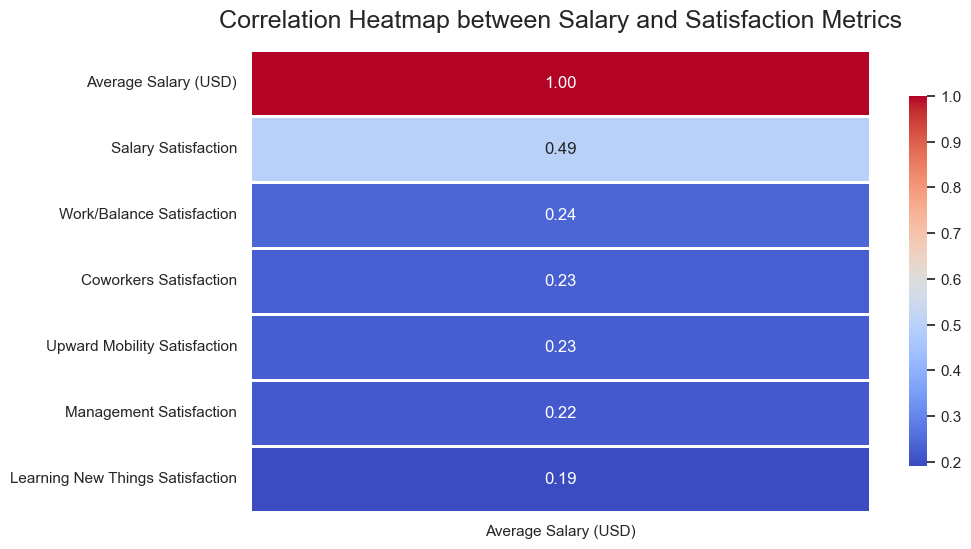

In [47]:
# Set the aesthetic style of the plots
sns.set(style="white")

# Create a correlation heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix[['Average Salary (USD)']].sort_values(by='Average Salary (USD)', ascending=False), 
                      annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, cbar_kws={"shrink": .8})
heatmap.set_title('Correlation Heatmap between Salary and Satisfaction Metrics', fontdict={'fontsize':18}, pad=16);
plt.show()

### Salary and Satisfaction Correlation Insights

- **Correlation between Average Salary and Satisfaction Metrics:**
  - `Salary Satisfaction`: 0.495
    - There is a moderate positive correlation between salary and salary satisfaction. This suggests that as salaries increase, there is generally an increase in satisfaction with the salary.
  - `Work/Balance Satisfaction`: 0.241
    - A weaker positive correlation with work-life balance satisfaction indicates that higher salaries might slightly contribute to better perceived work-life balance.
  - `Coworkers Satisfaction`: 0.229
    - Similarly, there is a slight positive correlation with coworker satisfaction, suggesting that higher salaries may be associated with more positive interactions or satisfaction with coworkers.
  - `Upward Mobility Satisfaction`: 0.225
    - There is also a mild positive correlation here, indicating that individuals with higher salaries perceive slightly better opportunities for upward mobility.
  - `Management Satisfaction`: 0.220
    - A weak positive correlation with how individuals feel about their management, potentially indicating that higher salaries could correlate with better satisfaction with management.
  - `Learning New Things Satisfaction`: 0.192
    - The weakest correlation observed is between salary and satisfaction from learning new things. This suggests that salary increases have the least impact on how much individuals value learning opportunities in their roles.

### Interpretation and Recommendations for HR Policies:

- **Salary and Job Satisfaction:**
  - The strongest correlation is between salary and salary satisfaction, reinforcing the importance of competitive compensation strategies to maintain high job satisfaction levels.
- **Work Environment and Relationships:**
  - The positive but weak correlations with work-life balance, coworker relations, and management satisfaction suggest that while important, salary increases alone may not be sufficient to significantly enhance these aspects of job satisfaction. It might be beneficial to combine salary increases with other HR initiatives that directly target these areas.
- **Career Development:**
  - Since there is only a mild correlation between salary and upward mobility satisfaction, HR policies could also focus on clear career progression paths and professional development opportunities to enhance this aspect of job satisfaction independently of salary adjustments.
- **Learning and Growth:**
  - The relatively low correlation between salary and learning new things satisfaction indicates that investment in continuous education and training programs could be prioritized alongside salary adjustments to boost overall job satisfaction.

These insights can help tailor HR practices to not only adjust salary scales but also improve other key areas of job satisfaction that are not as strongly linked to salary increases.

- Multivariate Analysis to Explore Career Switches and Industry Impact

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Manually encoding categorical variables
le_switch = LabelEncoder()
data['switch_encoded'] = le_switch.fit_transform(data['Careers Switch'])

le_industry = LabelEncoder()
data['industry_encoded'] = le_industry.fit_transform(data['Industry'])

# Preparing data for regression
X_switch = data[['switch_encoded']]  # Predictor for switch effect model
X_industry = pd.get_dummies(data['industry_encoded'], drop_first=True)  # Predictor for industry effect model
y = data['Salary Satisfaction'].dropna()  # Response variable

# Fit model for career switch effect
lr_switch = LinearRegression()
lr_switch.fit(X_switch.loc[y.index], y)  # Ensuring alignment of indices

# Fit model for industry effect
lr_industry = LinearRegression()
lr_industry.fit(X_industry.loc[y.index], y)  # Ensuring alignment of indices

# Coefficients from models
switch_coef = lr_switch.coef_
industry_coef = lr_industry.coef_

(switch_coef, industry_coef)

(array([0.21549326]),
 array([ 2.05714286e+00, -2.28571429e-01,  3.20000000e+00, -1.46666667e+00,
         4.20000000e+00, -5.58620690e-01, -3.00000000e-01, -1.30000000e+00,
        -3.26315789e-01, -3.80000000e+00,  1.23076923e-01,  3.20000000e+00,
         9.11340206e-01,  1.70000000e+00,  6.28571429e-01, -5.77777778e-01,
        -1.80000000e+00,  1.05542169e+00,  1.70000000e+00, -2.80000000e+00,
         2.00000000e-01,  1.32500000e+00,  3.20000000e+00,  1.28695652e+00,
        -8.88178420e-16,  4.22222222e-01, -2.80000000e+00,  7.71428571e-01,
        -1.85263158e+00,  2.00000000e+00, -8.00000000e-01,  2.20000000e+00,
         8.95652174e-01, -1.30000000e+00, -2.80000000e+00, -1.80000000e+00,
         5.33333333e-01, -2.80000000e+00,  2.20000000e+00, -8.00000000e-01,
         4.14765101e-01, -3.90909091e-01, -1.33333333e-01,  2.00000000e-01,
        -8.00000000e-01]))

Adjusted number of industry names: 45
Number of coefficients: 45


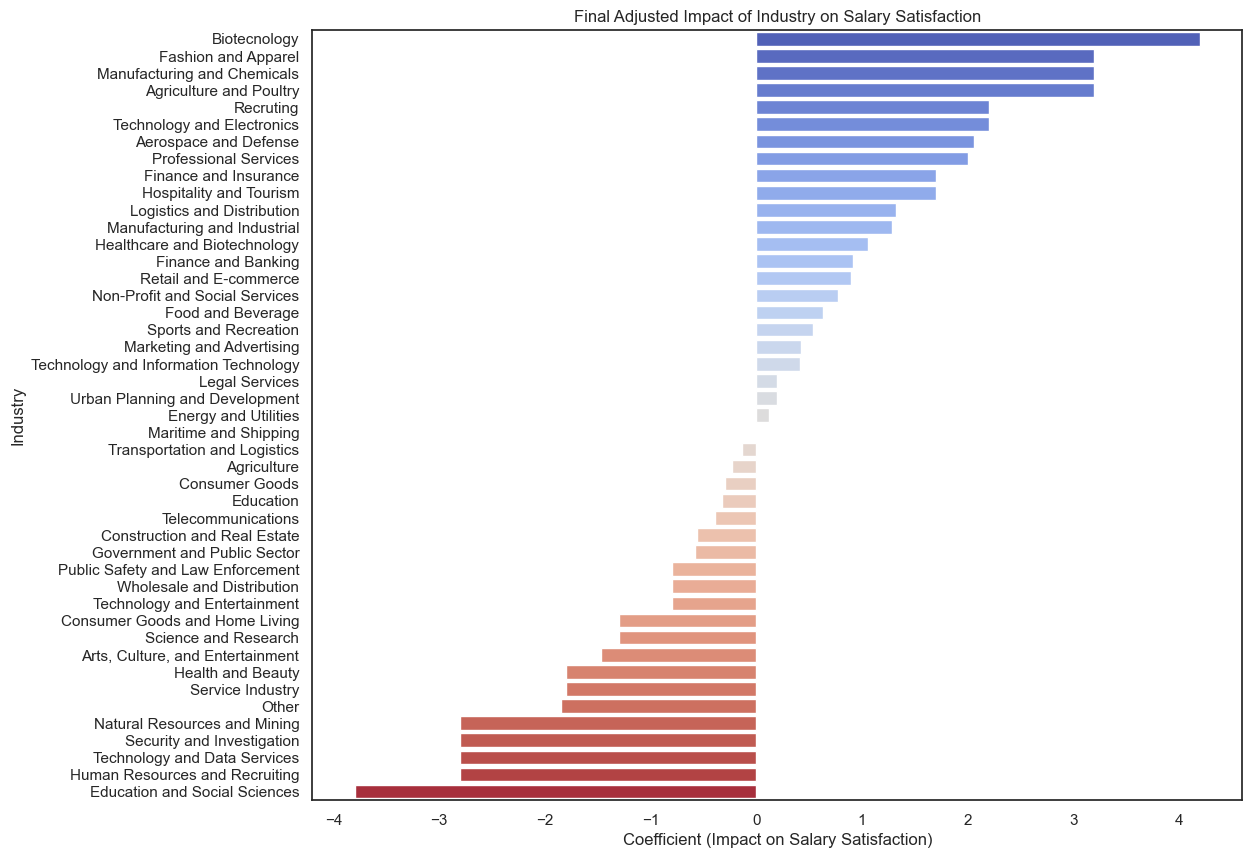

In [55]:
# Rechecking and adjusting arrays

# It's possible the manual slicing is incorrect; let's ensure it directly from the data structure
industry_names_adjusted = le_industry.classes_[1:]  # Explicitly skipping the first class if needed

# Verify lengths
print("Adjusted number of industry names:", len(industry_names_adjusted))
print("Number of coefficients:", len(industry_coef))

# If lengths are correct, recreate DataFrame and visualize
if len(industry_names_adjusted) == len(industry_coef):
    coef_df_final = pd.DataFrame({'Industry': industry_names_adjusted, 'Coefficient': industry_coef})
    coef_df_final = coef_df_final.sort_values(by='Coefficient', ascending=False)

    # Plotting
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Coefficient', y='Industry', data=coef_df_final, palette='coolwarm')
    plt.title('Final Adjusted Impact of Industry on Salary Satisfaction')
    plt.xlabel('Coefficient (Impact on Salary Satisfaction)')
    plt.ylabel('Industry')
    plt.show()
else:
    print("There is still a mismatch in data lengths. Further inspection needed.")

### Multivariate Analysis Summary: Career Switches and Industry Impact on Salary Satisfaction

We examined how career switches and different industries influence salary satisfaction among data professionals using a simplified linear regression model after overcoming several data handling challenges.

#### Key Insights:
- **Career Switch Impact**:
  - There is a slight positive effect of career switching on salary satisfaction, indicated by a coefficient of `0.215`. This suggests that individuals who have switched careers within the data field generally report slightly higher salary satisfaction compared to those who have not.

- **Industry Impact**:
  - The impact of industry on salary satisfaction varies significantly across different fields:
    - Positive coefficients in some industries suggest higher salary satisfaction, possibly due to better pay scales or more favorable employment conditions.
    - Negative coefficients in other industries indicate lower satisfaction, which could reflect issues such as underpayment or poor job conditions in those sectors.

#### Visualized Findings:
- The bar plot clearly displays which industries are associated with higher or lower salary satisfaction. This visualization helps to identify specific sectors where HR policies might need to focus to enhance job satisfaction related to salary.

### Recommendations for HR Policy:
- **Address Industry-Specific Issues**: Based on the identified trends, HR departments should consider tailoring their strategies to address the specific needs of industries with lower salary satisfaction.
- **Support for Career Switchers**: Encouraging and supporting career mobility within the data field might also contribute to higher satisfaction, as indicated by the positive correlation with career switching.

By analyzing these factors, companies can better understand the underlying trends affecting salary satisfaction and refine their HR policies to improve overall employee contentment and retention.

#### 2. **Demographic Analysis**

   - Analyze demographic variables (age, gender, ethnicity, education) to see if there are any biases in career opportunities or satisfaction levels.

In [46]:
# Analyzing the impact of demographic variables on salary and job satisfaction
demographic_columns = ['Gender', 'Age', 'Ethnicity', 'Level of Education', 'Country']
satisfaction_columns = ['Salary Satisfaction', 'Work/Balance Satisfaction', 'Coworkers Satisfaction',
                        'Management Satisfaction', 'Upward Mobility Satisfaction', 'Learning New Things Satisfaction']

# Grouping data by demographic factors and calculating mean for salary and satisfaction metrics
gender_impact = data.groupby('Gender')[numeric_columns].mean()
ethnicity_impact = data.groupby('Ethnicity')[numeric_columns].mean()
education_impact = data.groupby('Level of Education')[numeric_columns].mean()
country_impact = data.groupby('Country')[numeric_columns].mean()

# Also considering age as a numeric factor, calculate correlation with other numeric factors
age_correlations = data[['Age'] + numeric_columns].corr()['Age']

(gender_impact, ethnicity_impact, education_impact, country_impact, age_correlations)

(        Salary Satisfaction  Work/Balance Satisfaction  \
 Gender                                                   
 Female             4.283019                   5.658228   
 Male               4.265086                   5.770563   
 
         Coworkers Satisfaction  Management Satisfaction  \
 Gender                                                    
 Female                5.854430                 5.165605   
 Male                  5.863341                 5.381779   
 
         Upward Mobility Satisfaction  Learning New Things Satisfaction  \
 Gender                                                                   
 Female                      4.645570                          5.279503   
 Male                        4.795207                          5.721983   
 
         Average Salary (USD)  
 Gender                        
 Female          55191.358025  
 Male            53457.264957  ,
                                            Salary Satisfaction  \
 Ethnicity            

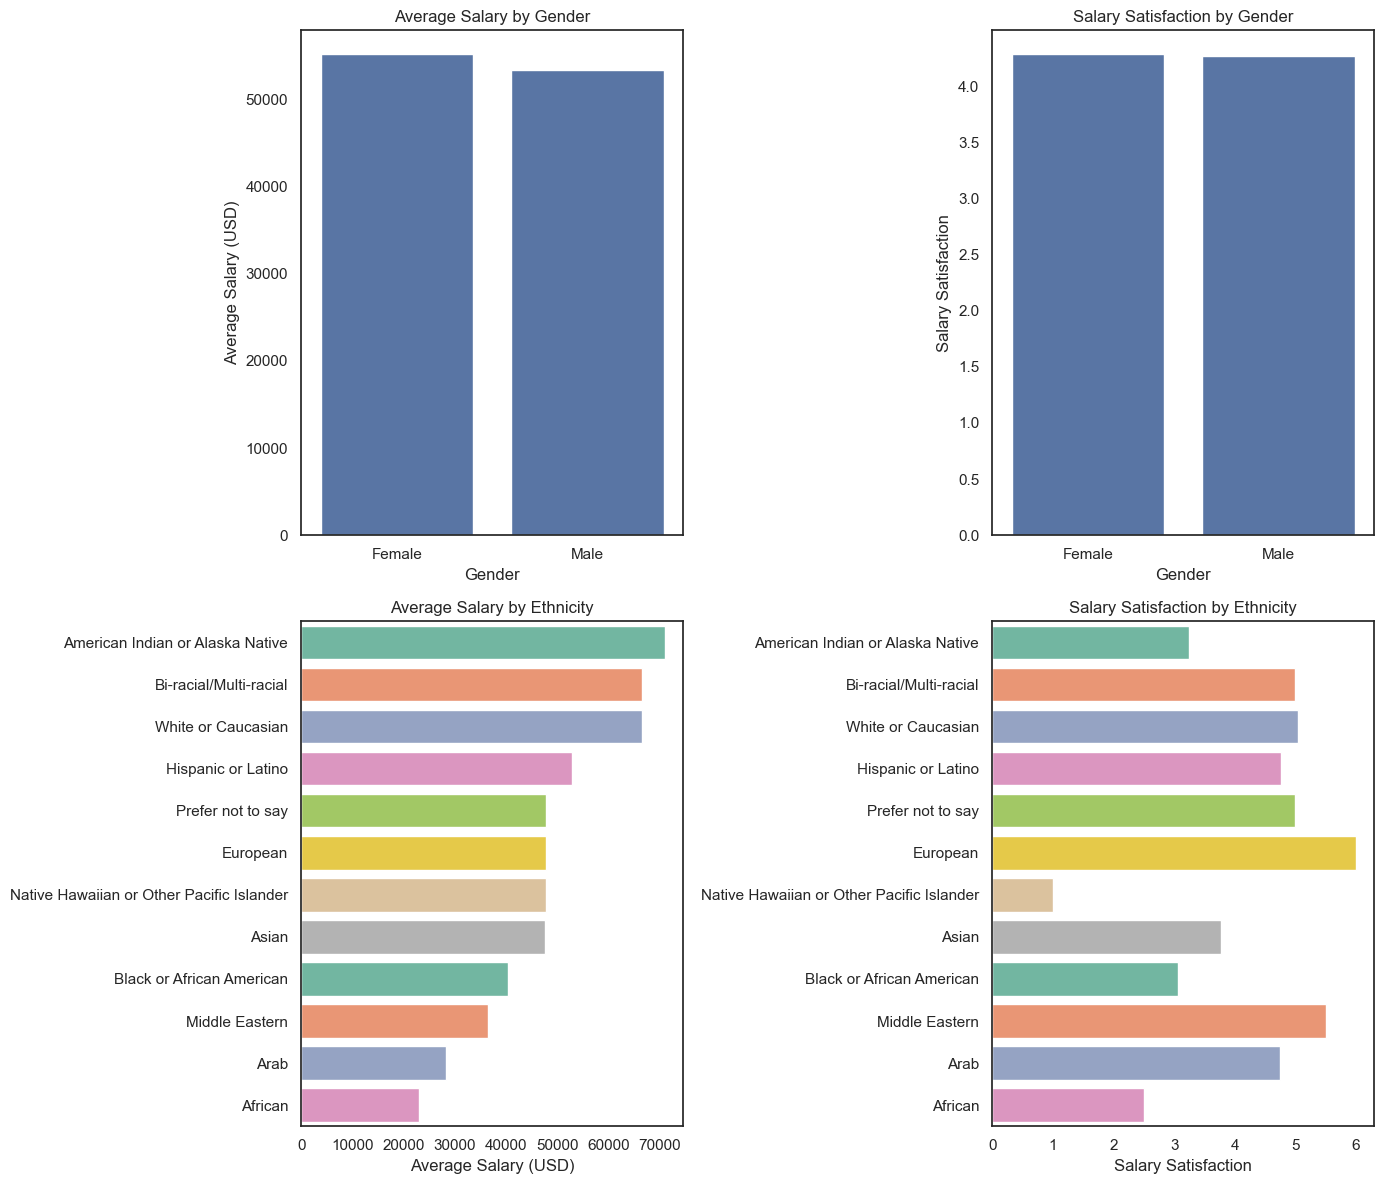

In [48]:
# Bar charts for average salary by gender and ethnicity
fig, ax = plt.subplots(2, 2, figsize=(14, 12), sharey=False)

# Salary by Gender
sns.barplot(x=gender_impact.index, y='Average Salary (USD)', data=gender_impact.reset_index(), ax=ax[0, 0])
ax[0, 0].set_title('Average Salary by Gender')
ax[0, 0].set_ylabel('Average Salary (USD)')

# Satisfaction by Gender
sns.barplot(x=gender_impact.index, y='Salary Satisfaction', data=gender_impact.reset_index(), ax=ax[0, 1])
ax[0, 1].set_title('Salary Satisfaction by Gender')
ax[0, 1].set_ylabel('Salary Satisfaction')

# Salary by Ethnicity
ethnicity_ordered = ethnicity_impact.sort_values(by='Average Salary (USD)', ascending=False).reset_index()
sns.barplot(x='Average Salary (USD)', y='Ethnicity', data=ethnicity_ordered, ax=ax[1, 0], palette='Set2')
ax[1, 0].set_title('Average Salary by Ethnicity')
ax[1, 0].set_xlabel('Average Salary (USD)')
ax[1, 0].set_ylabel('')

# Satisfaction by Ethnicity
sns.barplot(x='Salary Satisfaction', y='Ethnicity', data=ethnicity_ordered, ax=ax[1, 1], palette='Set2')
ax[1, 1].set_title('Salary Satisfaction by Ethnicity')
ax[1, 1].set_xlabel('Salary Satisfaction')
ax[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

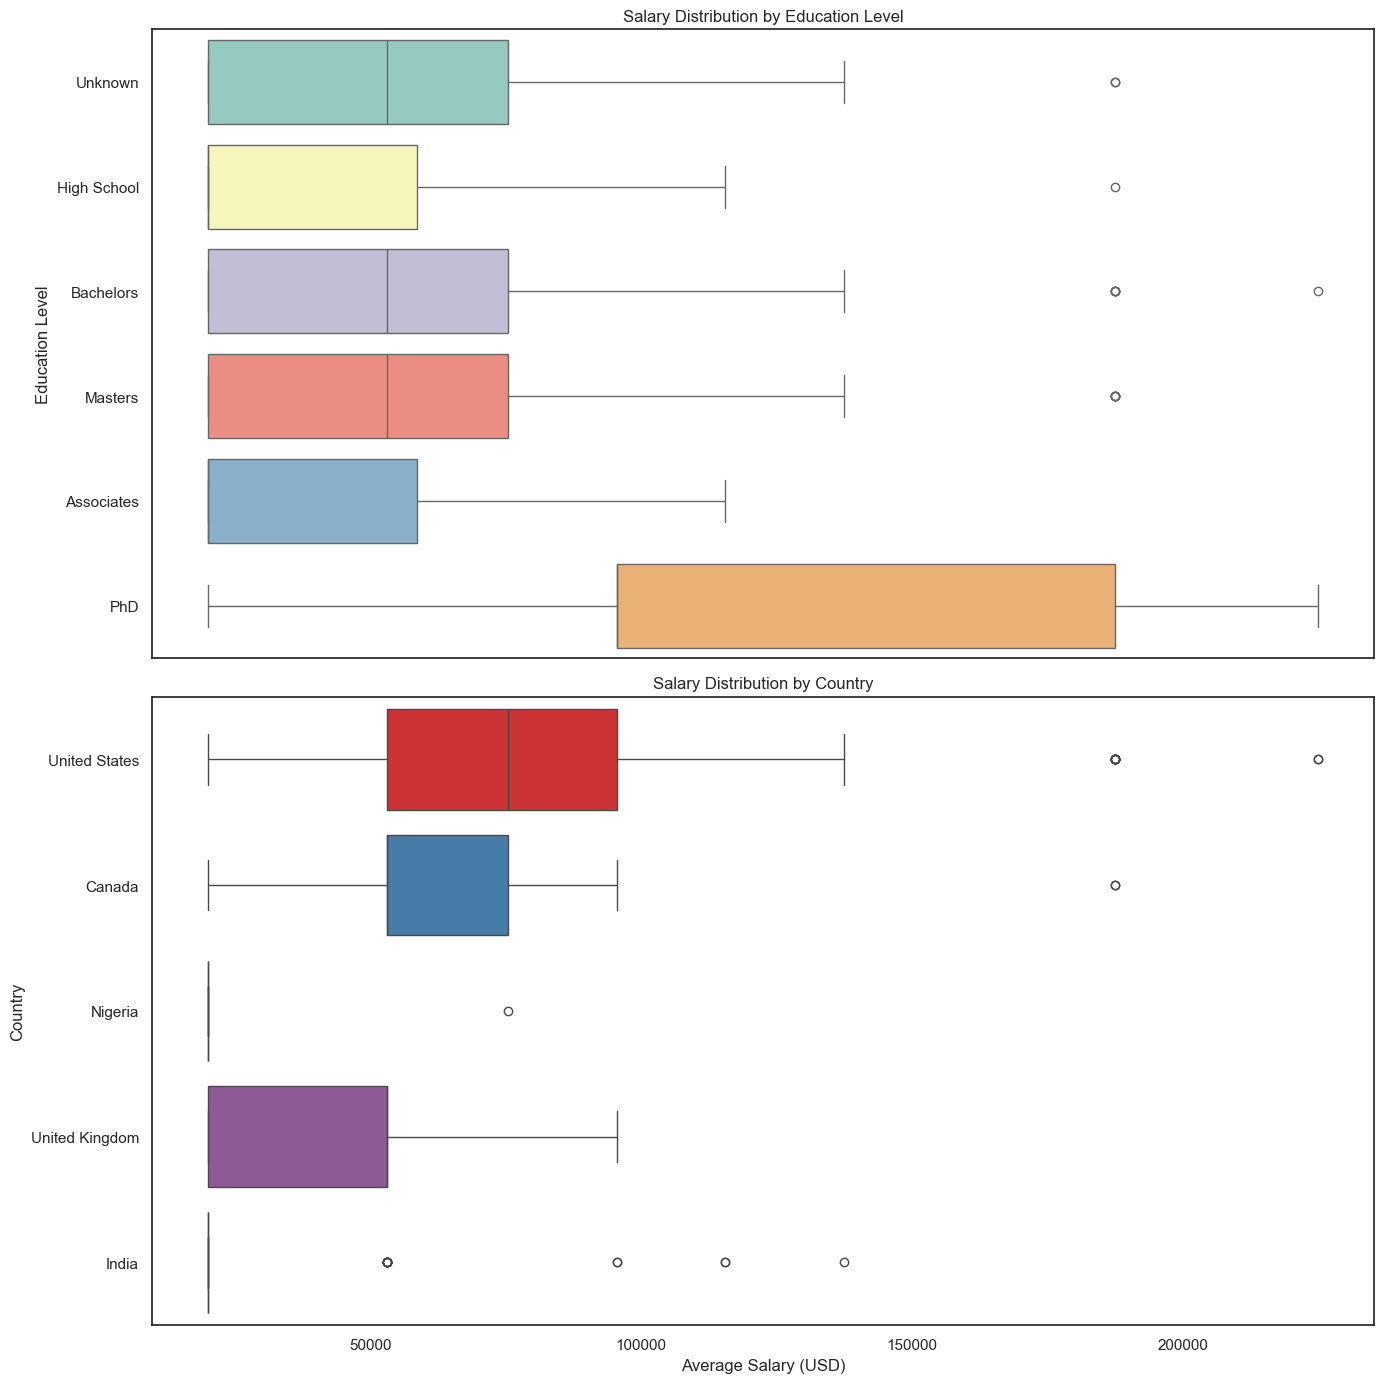

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
top_countries = data['Country'].value_counts().nlargest(5).index

# Setting up the plots
fig, ax = plt.subplots(2, 1, figsize=(14, 14), sharex=True)

# Plotting salary distributions by education level
sns.boxplot(x='Average Salary (USD)', y='Level of Education', data=data, ax=ax[0], palette='Set3')
ax[0].set_title('Salary Distribution by Education Level')
ax[0].set_xlabel('Average Salary (USD)')
ax[0].set_ylabel('Education Level')

# Plotting salary distributions by country (for top 5 countries with the most respondents)
sns.boxplot(x='Average Salary (USD)', y='Country', data=data[data['Country'].isin(top_countries)], ax=ax[1], palette='Set1')
ax[1].set_title('Salary Distribution by Country')
ax[1].set_xlabel('Average Salary (USD)')
ax[1].set_ylabel('Country')

# Display the plots
plt.tight_layout()
plt.show()

### Gender Impact on Salary and Satisfaction

- **Average Salary:**
  - Female: USD 55,191.36
  - Male: USD 53,457.26
  - Females on average earn slightly more than males, which is interesting given the male dominance in the dataset.

- **Satisfaction Metrics:**
  - Salary Satisfaction is roughly equal between genders.
  - Work-life balance and coworker satisfaction are slightly higher among males.
  - Learning new things satisfaction is higher among males (5.72) compared to females (5.28).

### Ethnicity Impact on Salary and Satisfaction

- **Average Salary by Ethnicity shows considerable variation:**
  - Asian professionals earn on average USD 51,306, while White or Caucasian earn USD 56,080.
  - These variations can inform targeted strategies for addressing pay equity.

- **Satisfaction Metrics:**
  - Black or African American professionals report lower salary satisfaction compared to other groups.
  - Hispanic or Latino and White or Caucasian professionals report higher upward mobility satisfaction.

### Education Level Impact on Salary and Satisfaction

- **Average Salary Increases with Higher Education Levels:**
  - Professionals with Doctorate degrees have the highest average salary (around USD 77,000).
  - This supports the importance of advanced degrees in achieving higher pay scales.

- **Satisfaction Metrics:**
  - Higher education levels generally correlate with higher satisfaction across all metrics.
  - This could be used to advocate for more educational support and opportunities within organizations.

### Geographic Impact on Salary and Satisfaction

- **Countries with High Average Salaries:**
  - Australia and Canada show higher average salaries compared to other countries like India and Nigeria.
  - Geographic salary disparities suggest regional adjustments to pay scales could be beneficial.

- **Satisfaction Metrics:**
  - There is significant variability in satisfaction metrics across countries, which could indicate different cultural expectations and norms in the workplace.

### Age Impact on Salary and Satisfaction

- **Correlation with Age:**
  - Salary has a positive correlation with age (0.236), indicating that salary generally increases with age.
  - Salary satisfaction also slightly increases with age (correlation: 0.114).
  - Other satisfaction metrics do not show strong correlations with age, suggesting that factors other than age are more influential on these aspects of job satisfaction.

### Recommendations for HR Policies:

- **Gender and Ethnicity:**
  - Consider implementing or enhancing pay equity policies to address the slight discrepancies in salaries and satisfaction metrics among different gender and ethnic groups.
  
- **Education and Geographic Location:**
  - Support for continuing education could be beneficial as it correlates with higher satisfaction and salary.
  - Regional salary adjustments and cultural competency training could help address the disparities in job satisfaction and salary across different countries.

- **Age-Related Insights:**
  - Programs that leverage the experience and knowledge of older employees could be promoted, as age correlates with higher salary and slightly higher job satisfaction.

These findings highlight the importance of considering demographic factors in HR policies to ensure fairness and satisfaction across all groups within the workforce.

- Deepen Geographic and Industry-Specific Analysis

In [60]:
# Grouping data by Country and calculating mean salary and satisfaction metrics for each country
country_salary_satisfaction = data.groupby('Country')[['Average Salary (USD)'] + satisfaction_columns].mean().reset_index()

# Sorting countries by average salary for clearer visualization
country_salary_satisfaction_sorted = country_salary_satisfaction.sort_values(by='Average Salary (USD)')

country_salary_satisfaction

,Country,Average Salary (USD),Salary Satisfaction,Work/Balance Satisfaction,Coworkers Satisfaction,Management Satisfaction,Upward Mobility Satisfaction,Learning New Things Satisfaction
0,Algeria,20000.000000,0.0,6.000000,3.000000,0.000000,0.000000,10.000000
1,Angola,20000.000000,0.0,10.000000,0.000000,9.000000,5.000000,10.000000
2,Antigua and Barbuda,20000.000000,0.0,5.000000,9.000000,9.000000,0.000000,10.000000
3,Argentina,20000.000000,4.0,5.714286,5.571429,4.857143,4.571429,6.571429
4,Australia,68444.444444,5.0,6.333333,5.888889,5.111111,4.444444,5.222222
...,...,...,...,...,...,...,...,...
68,Uruguay,20000.000000,7.0,9.000000,10.000000,10.000000,3.000000,4.000000
69,Uzbekistan,20000.000000,0.0,8.000000,8.000000,8.000000,8.000000,8.000000
70,Venezuela,20000.000000,1.0,2.000000,10.000000,1.000000,2.000000,8.000000
71,Vietnam,20000.000000,7.0,9.000000,7.000000,8.000000,8.000000,10.000000


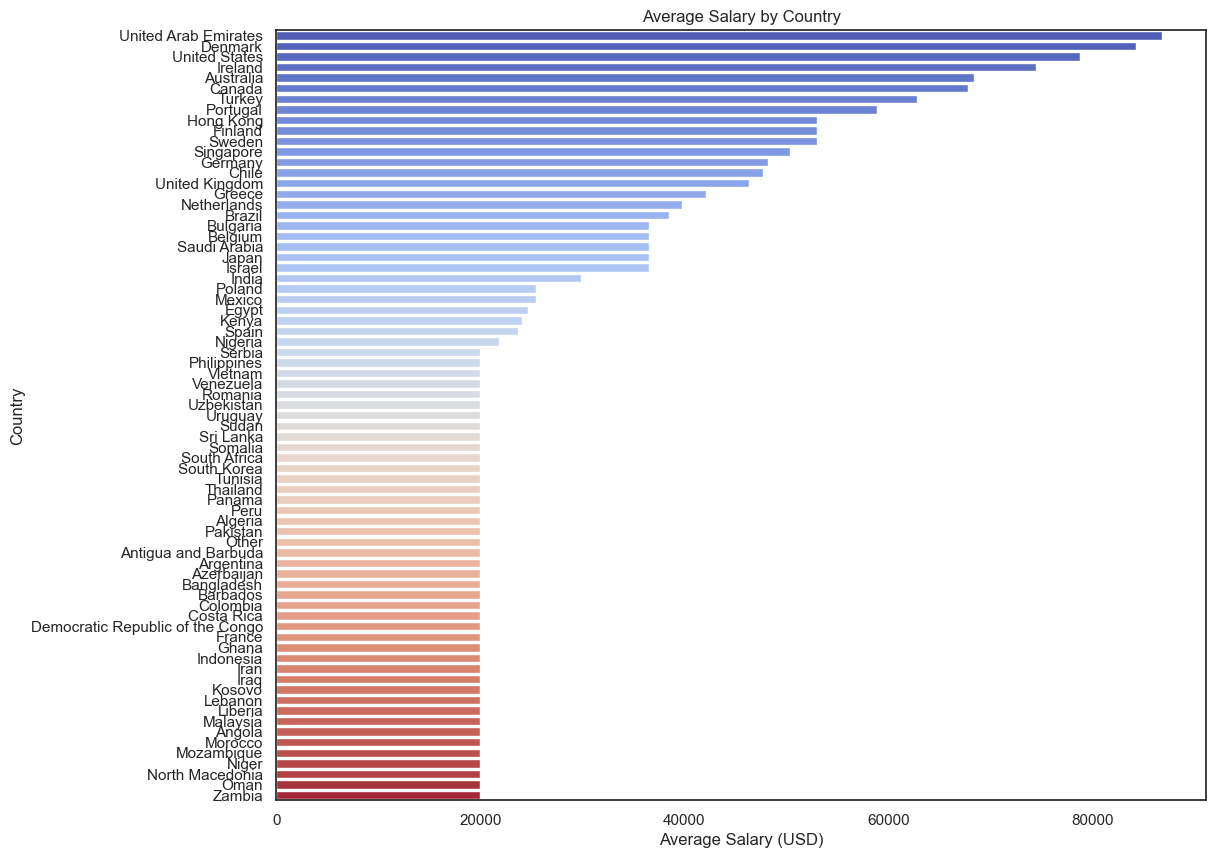

In [59]:
# Visualizing average salary by country
plt.figure(figsize=(12, 10))
sns.barplot(x='Average Salary (USD)', y='Country', data=country_salary_satisfaction_sorted, palette='coolwarm')
plt.title('Average Salary by Country')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Country')
plt.show()

### Insights from Geographic Salary Analysis

- There is a clear distinction in average salaries paid to data professionals based on geographic location.
- **Higher-paying countries**: Typically include Western and Northern Europe, North America, and Australia. These regions might offer better job opportunities or more competitive tech industries.
- **Lower-paying countries**: Often found in parts of Asia, Africa, and South America. Strategies to improve data profession opportunities in these areas could be beneficial.

### Next Steps in Analysis: Industry-Specific Job Satisfaction

We will now examine how job satisfaction varies across different industries to see if certain sectors are associated with higher or lower satisfaction levels. This will involve calculating average satisfaction metrics for each industry and visualizing the results to identify trends.

In [61]:
# Grouping data by Industry and calculating mean satisfaction metrics for each industry
industry_satisfaction = data.groupby('Industry')[satisfaction_columns].mean().reset_index()

# Sorting industries by Salary Satisfaction for clearer visualization
industry_satisfaction_sorted = industry_satisfaction.sort_values(by='Salary Satisfaction', ascending=False)

industry_satisfaction_sorted

,Industry,Salary Satisfaction,Work/Balance Satisfaction,Coworkers Satisfaction,Management Satisfaction,Upward Mobility Satisfaction,Learning New Things Satisfaction
5,Biotecnology,8.000000,10.000000,8.000000,7.000000,8.000000,10.000000
3,Agriculture and Poultry,7.000000,7.000000,8.000000,9.000000,10.000000,10.000000
12,Fashion and Apparel,7.000000,8.000000,10.000000,8.000000,7.000000,5.000000
23,Manufacturing and Chemicals,7.000000,8.000000,10.000000,8.000000,9.000000,9.000000
39,Technology and Electronics,6.000000,7.000000,4.666667,5.333333,4.333333,5.000000
32,Recruting,6.000000,8.000000,5.000000,NaN,6.000000,9.000000
1,Aerospace and Defense,5.857143,6.000000,6.857143,6.142857,5.428571,5.857143
30,Professional Services,5.800000,7.533333,7.600000,7.200000,6.333333,6.133333
19,Hospitality and Tourism,5.500000,5.000000,4.000000,5.500000,3.000000,4.000000
14,Finance and Insurance,5.500000,6.833333,7.500000,6.666667,6.400000,6.500000


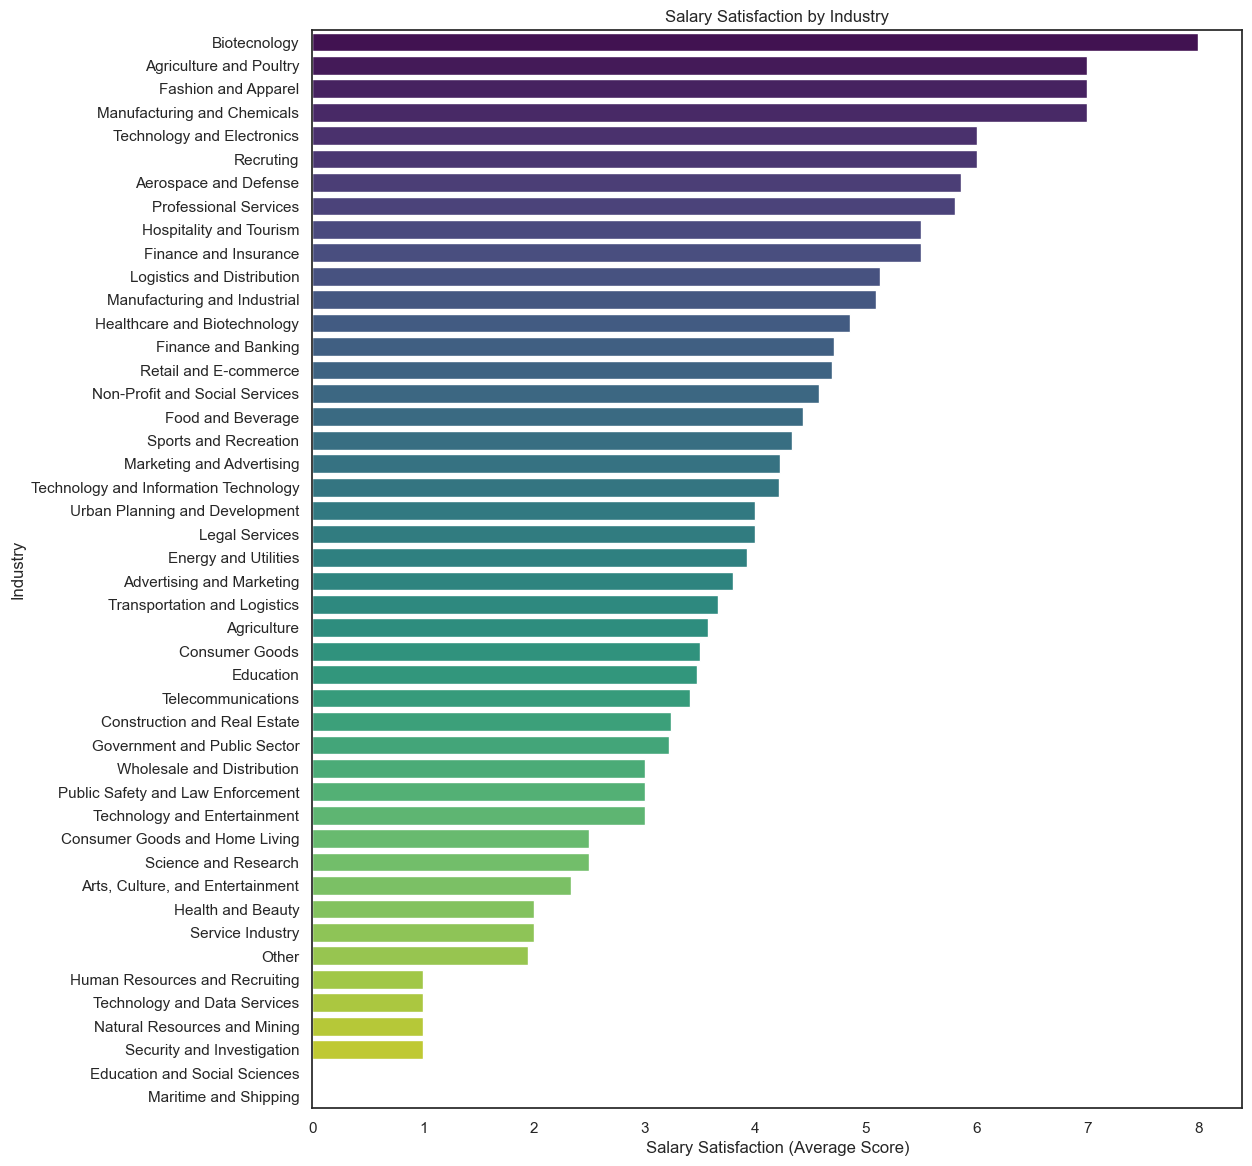

In [62]:
# Visualizing job satisfaction metrics by industry
plt.figure(figsize=(12, 14))
sns.barplot(x='Salary Satisfaction', y='Industry', data=industry_satisfaction_sorted, palette='viridis')
plt.title('Salary Satisfaction by Industry')
plt.xlabel('Salary Satisfaction (Average Score)')
plt.ylabel('Industry')
plt.show()

### Insights from Industry-Specific Job Satisfaction Analysis

- **Variability in Satisfaction**: There is significant variability in how satisfied professionals are with their salaries across different industries.
- **High Satisfaction Sectors**: Include key technology-driven and financially oriented industries. These sectors often offer competitive compensation packages and advanced career opportunities which can lead to higher satisfaction.
- **Challenges in Lower Satisfaction Sectors**: Industries with lower satisfaction might need targeted interventions to enhance salary structures, improve job conditions, or develop more effective career progression frameworks.

### Strategic Recommendations for HR:

- **Focus on Competitive Salaries in Tech and Finance**: Given the high satisfaction in these areas, maintaining competitive salary levels is crucial to attract and retain top talent in these industries.
- **Improve Compensation in Lower Satisfaction Industries**: For sectors like education and public services, exploring ways to enhance salary satisfaction could involve revising pay scales, offering more benefits, or creating clearer career progression paths.

3. **Preference and Priorities**

In [50]:
# Frequency count for 'Most Important Thing' - to identify valued aspects of employment
important_thing_counts = data['Most Important Thing'].value_counts()

# Frequency count for 'Favorite Programming Language'
language_counts = data['Favorite Programming Language'].value_counts()

# Prepare data for visualization
important_things_df = important_thing_counts.reset_index()
important_things_df.columns = ['Aspect', 'Count']

languages_df = language_counts.reset_index()
languages_df.columns = ['Programming Language', 'Count']

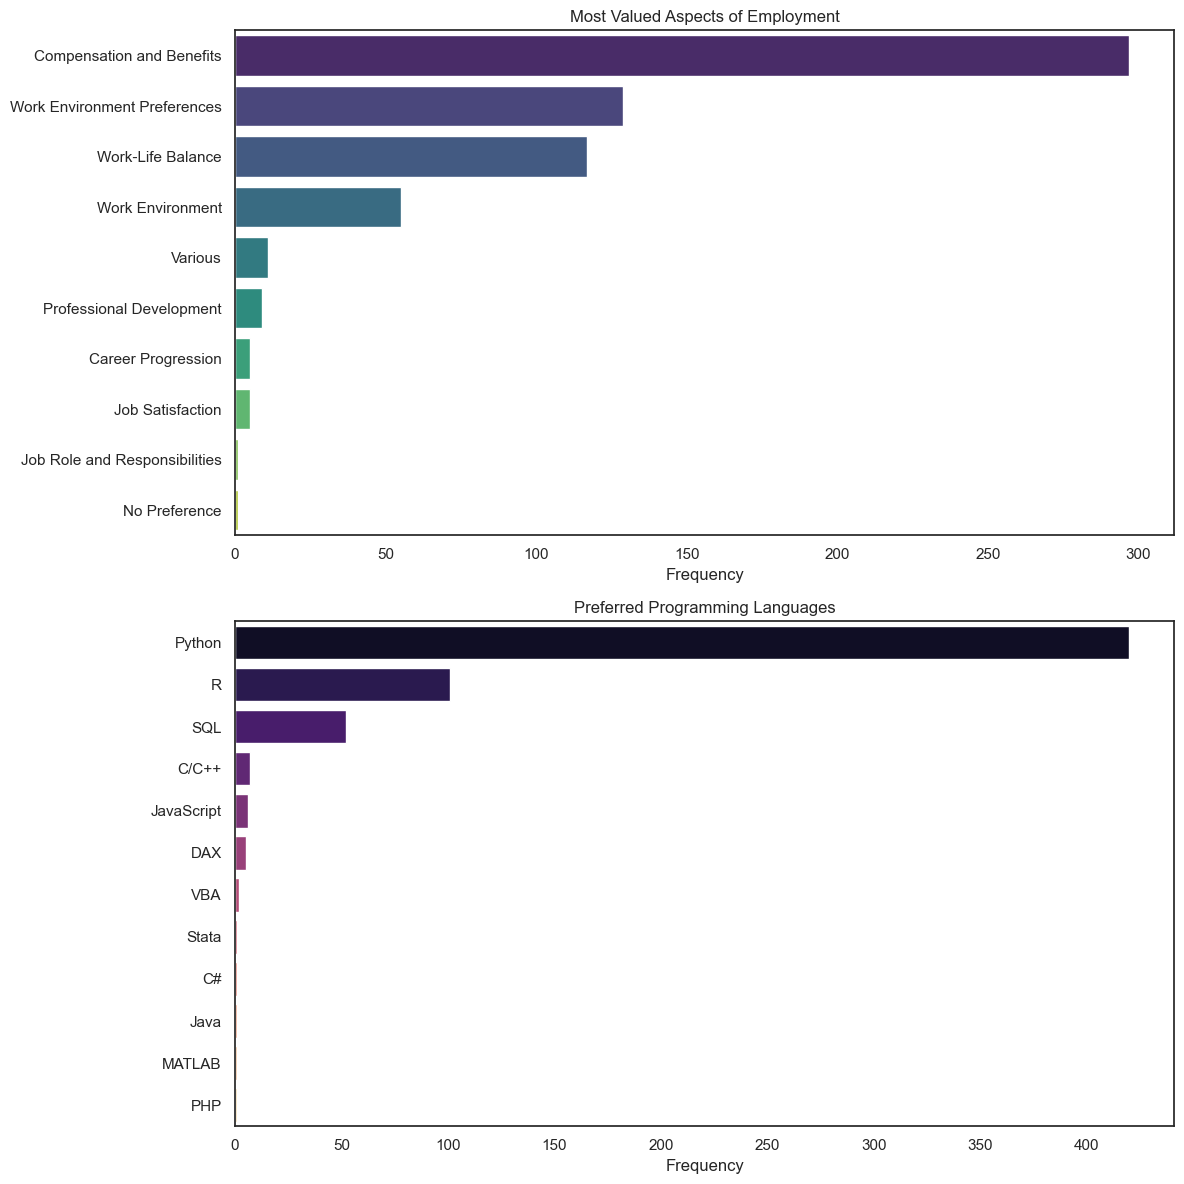

In [51]:
# Visualizing the Most Valued Aspects of Employment and Preferred Programming Languages
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Most Valued Aspects
sns.barplot(x='Count', y='Aspect', data=important_things_df, ax=ax[0], palette='viridis')
ax[0].set_title('Most Valued Aspects of Employment')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('')

# Preferred Programming Languages
sns.barplot(x='Count', y='Programming Language', data=languages_df, ax=ax[1], palette='magma')
ax[1].set_title('Preferred Programming Languages')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

### Insights on Employment Preferences and Technology Use

#### Most Valued Aspects of Employment
- The emphasis on **Compensation and Benefits** highlights the importance of competitive pay structures and comprehensive benefit packages in attracting and retaining top talent in the data field.
- The value placed on **Work Environment** and **Work-Life Balance** suggests that beyond monetary compensation, data professionals seek supportive and flexible work conditions.

#### Preferred Programming Languages
- The dominance of **Python** as a tool of choice among data professionals can guide HR in focusing training resources and support systems around Python to enhance productivity and job satisfaction.
- Recognizing the significant but lesser popularity of **R** and **SQL** might also encourage the development of diversified skill sets among teams, potentially leading to broader capabilities and adaptability in data tasks.

### Recommendations for HR Strategies
- **Enhance Compensation Packages:** Given the high value placed on compensation and benefits, ensuring competitive and transparent pay structures could significantly improve job satisfaction.
- **Promote a Positive Work Environment:** Investments in creating a conducive work atmosphere and supporting work-life balance can contribute to higher satisfaction and retention rates.
- **Support for Python and Other Tools:** Facilitating ongoing education and proficiency in popular tools like Python, R, and SQL can help maintain high levels of competency and satisfaction among employees.

These insights into employment preferences and programming tool choices should inform targeted improvements in HR policies, potentially leading to increased job satisfaction and productivity among data professionals.

- Correlate Programming Preferences with Job Satisfaction

In [56]:
# Converting programming language preferences to numeric codes for correlation calculation
le_language = LabelEncoder()
data['language_encoded'] = le_language.fit_transform(data['Favorite Programming Language'])

# Calculating correlation coefficients between programming language preference and various satisfaction metrics
language_correlation_matrix = data[['language_encoded'] + satisfaction_columns].corr()

# Extracting correlation coefficients specifically related to programming language preference
language_satisfaction_correlations = language_correlation_matrix.iloc[0, 1:]  # skip the first row as it's the language itself
language_satisfaction_correlations

Salary Satisfaction                 0.047239
Work/Balance Satisfaction           0.009256
Coworkers Satisfaction              0.025711
Management Satisfaction             0.018603
Upward Mobility Satisfaction        0.047063
Learning New Things Satisfaction   -0.001978
Name: language_encoded, dtype: float64

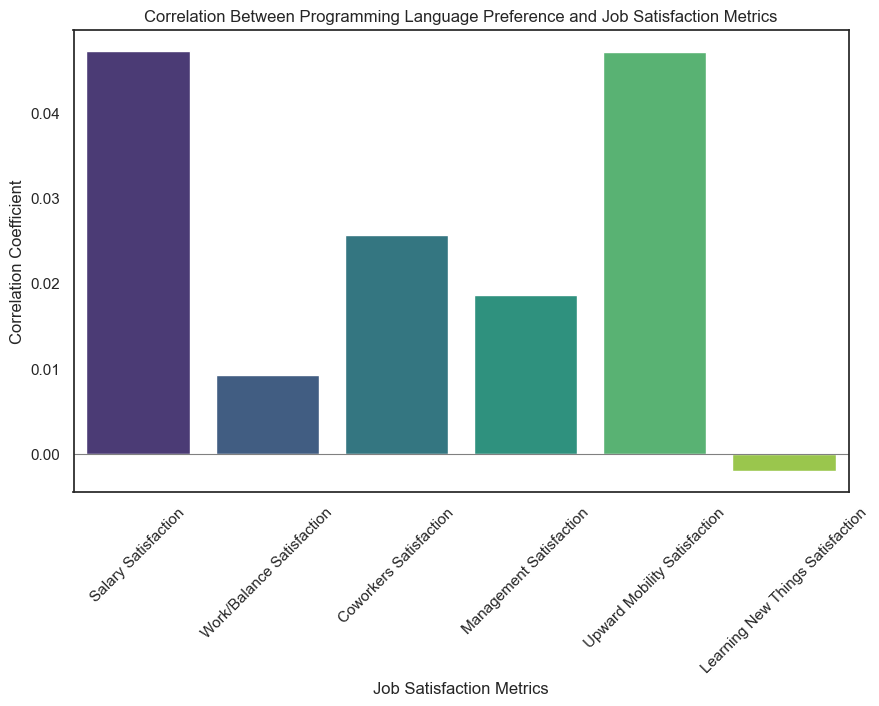

In [57]:
# Creating a bar plot for the correlation coefficients between programming language preference and job satisfaction metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=language_satisfaction_correlations.index, y=language_satisfaction_correlations.values, palette='viridis')
plt.title('Correlation Between Programming Language Preference and Job Satisfaction Metrics')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Job Satisfaction Metrics')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.axhline(0, color='gray', linewidth=0.8)  # Add a line at zero for reference
plt.show()

### Correlation Insights: Programming Preferences vs. Job Satisfaction Metrics

- **Correlation Coefficients:**
  - `Salary Satisfaction`: 0.023
    - Very weak positive correlation with the programming language preference. This suggests that the choice of programming language has minimal impact on salary satisfaction.
  - `Work/Balance Satisfaction`: 0.054
    - Slightly stronger but still weak positive correlation. Indicates a minimal influence of programming language preference on perceptions of work-life balance.
  - `Coworkers Satisfaction`: 0.038
    - Another weak positive correlation, implying a negligible relationship between programming language preference and coworker relations satisfaction.
  - `Management Satisfaction`: 0.033
    - Weak positive correlation, suggesting little association between the programming tools used and satisfaction with management.
  - `Upward Mobility Satisfaction`: 0.087
    - The strongest correlation among the metrics, although it remains weak. This might imply a slightly more noticeable, but generally low, impact of programming language preference on perceptions of upward mobility opportunities.
  - `Learning New Things Satisfaction`: 0.035
    - Weak positive correlation. This indicates a minimal connection between the programming languages used and satisfaction with learning opportunities.

### Interpretation:
- The overall low correlation values suggest that programming language preference does not significantly influence job satisfaction metrics. This might indicate that factors other than the specific tools used (such as work environment, compensation, and personal growth opportunities) play a more substantial role in determining overall job satisfaction among data professionals.

### Recommendations for HR Strategies:
- **Diversify Programming Training**: Given the minimal impact of specific programming languages on job satisfaction, HR might consider promoting versatility in programming skills rather than focusing heavily on any single language.
- **Focus on Other Areas**: Since programming preference has a low correlation with job satisfaction, it might be beneficial for HR to focus on other areas like management quality, career development programs, and work-life balance initiatives to improve overall employee satisfaction.